Data loading and cleaning: Load the dataset into a Pandas DataFrame and perform some basic data cleaning, such as filling in missing values and encoding categorical variables.

## Step 1: Data loading and cleaning

# import modules

In [161]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display
import scipy.stats as st

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# set seaborn style

In [162]:
sns.set_style('darkgrid')

#increase pandas default max_rows to view all columns
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

In [163]:
# read dataset into pandas DataFrames 

train = pd.read_csv('./data/train .csv') 
test  = pd.read_csv('./data/test.csv')

# Get the dimensions of the train and test data
print("Training data set shape : {}".format(train.shape))
print("Testing data set shape : {}".format(test.shape))

Training data set shape : (1460, 81)
Testing data set shape : (1459, 80)


In [164]:
# Get the continuous features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_features = train.select_dtypes(include=numerics).columns


#numerical_features = [col for col in train.columns if train.dtypes[col] != 'object']
#numerical_features.remove('SalePrice')
#numerical_features.remove('Id')

print(numerical_features)

print("count of numerical features:",len(numerical_features))


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
count of numerical features: 38


In [165]:
# Get the categorical features
categorical_features = [col for col in train.columns if train.dtypes[col] == 'object']

print("categorical features")
print(categorical_features)

print("count of categorical features:",len(categorical_features))

categorical features
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
count of categorical features: 43


In [166]:
print('unique column values')
train.apply(lambda x: len(x.unique())).sort_values(ascending=False).head(16)


unique column values


Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        328
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
YearBuilt         112
dtype: int64

## Cardinality of categorical columns in training data

In [167]:
cardinality = train[categorical_features].apply(lambda x: len(x.unique()))
cardinality.sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
BsmtFinType2      7
Functional        7
GarageType        7
BsmtFinType1      7
Heating           6
Foundation        6
Electrical        6
SaleCondition     6
RoofStyle         6
GarageQual        6
GarageCond        6
FireplaceQu       6
HeatingQC         5
Fence             5
MiscFeature       5
MSZoning          5
BsmtExposure      5
MasVnrType        5
LotConfig         5
BsmtCond          5
BldgType          5
BsmtQual          5
ExterCond         5
KitchenQual       4
ExterQual         4
GarageFinish      4
PoolQC            4
LandContour       4
LotShape          4
PavedDrive        3
Alley             3
LandSlope         3
CentralAir        2
Street            2
Utilities         2
dtype: int64

## Cardinality of categorical columns in test data

In [168]:
cardinality = test[categorical_features].apply(lambda x: len(x.unique()))
cardinality.sort_values(ascending=False).head(40)

Neighborhood     25
Exterior2nd      16
Exterior1st      14
SaleType         10
Condition1        9
Functional        8
GarageType        7
BsmtFinType2      7
BsmtFinType1      7
HouseStyle        7
MSZoning          6
GarageCond        6
FireplaceQu       6
Foundation        6
SaleCondition     6
RoofStyle         6
BsmtQual          5
BsmtCond          5
KitchenQual       5
HeatingQC         5
GarageQual        5
Condition2        5
BsmtExposure      5
Fence             5
BldgType          5
ExterCond         5
MasVnrType        5
LotConfig         5
LandContour       4
LotShape          4
GarageFinish      4
MiscFeature       4
RoofMatl          4
Heating           4
ExterQual         4
Electrical        4
LandSlope         3
PavedDrive        3
PoolQC            3
Alley             3
dtype: int64

Columns that can be safely ordinal encoded

In [169]:
good_label_cols = [col for col in categorical_features if set(test[col]).issubset(set(train[col]))]
len(good_label_cols)

36

Those are problematic columns that eventually will be dropped

In [170]:
bad_label_cols = list(set(categorical_features)-set(good_label_cols))
bad_label_cols

['Exterior1st',
 'MSZoning',
 'Exterior2nd',
 'Utilities',
 'KitchenQual',
 'Functional',
 'SaleType']

## Missing values

First we will show the missing value within each feature. For this we will use subplot visualization with horizontal bars.

Subplot visualization is a technique used in data visualization to display multiple plots or charts together in a single figure. This can be useful when comparing different aspects of the same data or when presenting data that has been collected at different times or from different sources. By using subplots, we can effectively present a large amount of information in a compact and easy-to-read format.

When using subplots to display features and missing values in a graphic, we might create a matrix of small plots, where each plot represents a different feature of the data. Within each plot, we can use different colors or markers to indicate whether each observation is complete or contains missing values.

For example, we might create a matrix of scatterplots, where each scatterplot represents the relationship between two different features of the data. Within each scatterplot, we might use a different color or symbol to indicate observations that contain missing values. This can help us quickly identify any patterns or relationships that exist within the data, as well as any missing data that may need to be addressed before further analysis can be conducted.

Overall, subplot visualization is a powerful tool for displaying complex data in a clear and concise manner, and can be particularly useful when working with large datasets or datasets that contain missing values.

Text(0, 0.5, 'Features')

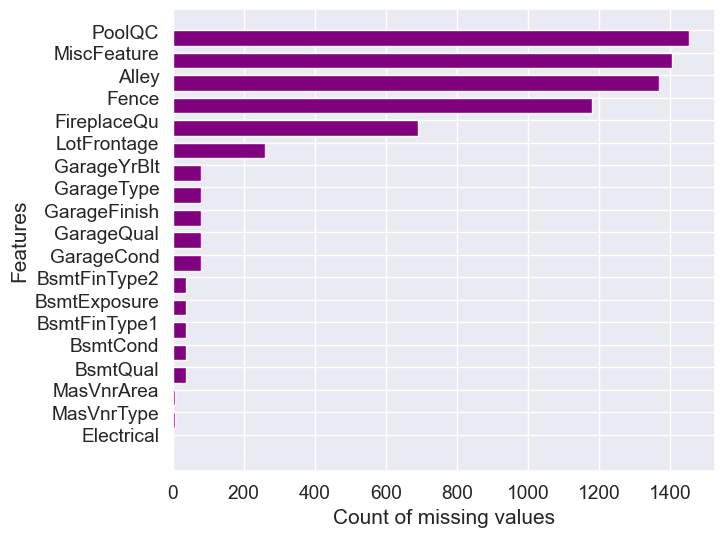

In [171]:
cols_with_missing = train.isnull().sum()
cols_with_missing = cols_with_missing[cols_with_missing>0]
cols_with_missing.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(7,6))  
width = 0.70 # the width of the bars 
ind = np.arange(len(cols_with_missing))  # the x locations for the groups
ax.barh(ind, cols_with_missing, width, color="purple")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(cols_with_missing.index, minor=False)
plt.xlabel('Count of missing values')
plt.ylabel('Features') 

*PoolQC*, *MiscFeature*, *Alley*, *Fence*, and *FireplaceQu* have many missing values.

## Count and percentage of missing values in training data

Knowing the count and percentage of missing values in training data is important for several reasons:

    1. Data Quality: Missing values in the training data can indicate data quality issues. If a large number of observations have missing values, it can suggest that there are issues with the data collection process, data cleaning, or data entry. By identifying the extent of missing values in the training data, we can take steps to address these data quality issues.

    2. Feature Selection: Missing values can also impact feature selection. If a feature has a large number of missing values, it may be less useful for predicting the target variable and may need to be dropped from the analysis. By knowing the extent of missing values in each feature, we can make informed decisions about which features to keep or drop.

    3. Imputation Strategy: The extent of missing values in the training data also affects the choice of imputation strategy. Imputation is the process of filling in missing values with some plausible values. The imputation strategy used depends on the extent and pattern of missing values in the data. By knowing the count and percentage of missing values in each feature, we can determine the most appropriate imputation strategy.

    4. Model Performance: Missing values can also affect the performance of machine learning models. Many machine learning algorithms cannot handle missing values and may require imputation or other techniques to handle them. By knowing the extent of missing values in the training data, we can choose appropriate modeling techniques and ensure that the model performance is not affected by missing values.

In summary, knowing the count and percentage of missing values in training data is essential for data quality, feature selection, imputation strategy, and model performance. It is an important step in the data preprocessing stage of a machine learning project.

In [172]:
print('Percentage of missing values in each columns')
#train.apply(lambda x: round((x.isna().sum()/len(x))*100,1))
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data_tr = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
missing_data_tr[missing_data_tr.Total>=1]
missing_data_tr.style.background_gradient('summer_r')

Percentage of missing values in each columns


In [173]:
train_null = train.isna().sum()
test_null  = test.isna().sum()
missing = pd.DataFrame(
              data=[train_null, train_null/train.shape[0]*100,
                    test_null, test_null/test.shape[0]*100],
              columns=train.columns,
              index=["Train Null", "Train Null (%)", "Test Null", "Test Null (%)"]
          ).T.sort_values(["Train Null", "Test Null"], ascending=False)

# Filter only columns with missing values
missing = missing.loc[(missing["Train Null"] > 0) | (missing["Test Null"] > 0)]
missing.style.background_gradient('summer_r')

In [174]:
# Count and percentage of  missing values in testing data
print('Percentage of missing values in each columns')
#test.apply(lambda x: round((x.isna().sum()/len(x))*100,1))
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data_te = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
missing_data_te[missing_data_te.Total>=1].style.background_gradient('summer_r')

Percentage of missing values in each columns


In [175]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'
missing_data_tr_c=missing_data_tr[missing_data_tr.Total>=1]
missing_data_te_c=missing_data_te[missing_data_te.Total>=1]
(missing_data_tr_c.describe() - missing_data_te_c.describe())[missing_data_tr_c.columns].T.iloc[:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

We can observe that :

- **Numerical columns**: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold
- **Categorical columns**: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilities
- There are **problematic** categories: Exterior2nd, Functional, Exterior1st, Utilities, KitchenQual, SaleType, MSZoning
- PoolQC, MiscFeature, Alley, and Fence) have over 50% missing values

In [176]:
train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

In [177]:
def diff_color(x):
    color = 'red' if x<0 else ('green' if x > 0 else 'black')
    return f'color: {color}'

(train.describe() - test.describe())[numerical_features].T.iloc[:,1:].style\
        .bar(subset=['mean', 'std'], align='mid', color=['#d65f5f', '#5fba7d'])\
        .applymap(diff_color, subset=['min', 'max'])

In [178]:
test.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

# Grid of distribution plots of all numerical features
# Face-Grid visualization

Facet grid visualization is a plotting technique used to display multiple plots side-by-side or in a grid, with each plot showing a different subset of the data. It is a way to explore the relationships between multiple variables in a dataset.

In a facet grid plot, the data is split into subsets based on the values of one or more categorical variables. Each subset of the data is then displayed in a separate plot within a grid of plots. The plots can be arranged in rows or columns, with each row or column showing a different level of the categorical variable(s).

For example, if we have a dataset with three categorical variables: gender, age group, and income level, we can use a facet grid plot to display plots of income level versus some other variable, such as age, for each gender separately. The resulting plot would show a grid of plots, with each row of plots showing a different gender, and each column of plots showing a different age group.

Facet grid visualization is a powerful tool for exploring the relationships between multiple variables in a dataset. It allows us to see how the relationships between variables vary across different subsets of the data, and can help us to identify patterns or trends that may not be visible in a single plot of the entire dataset. It is commonly used in data analysis and data science, as well as exploratory data analysis for machine learning.

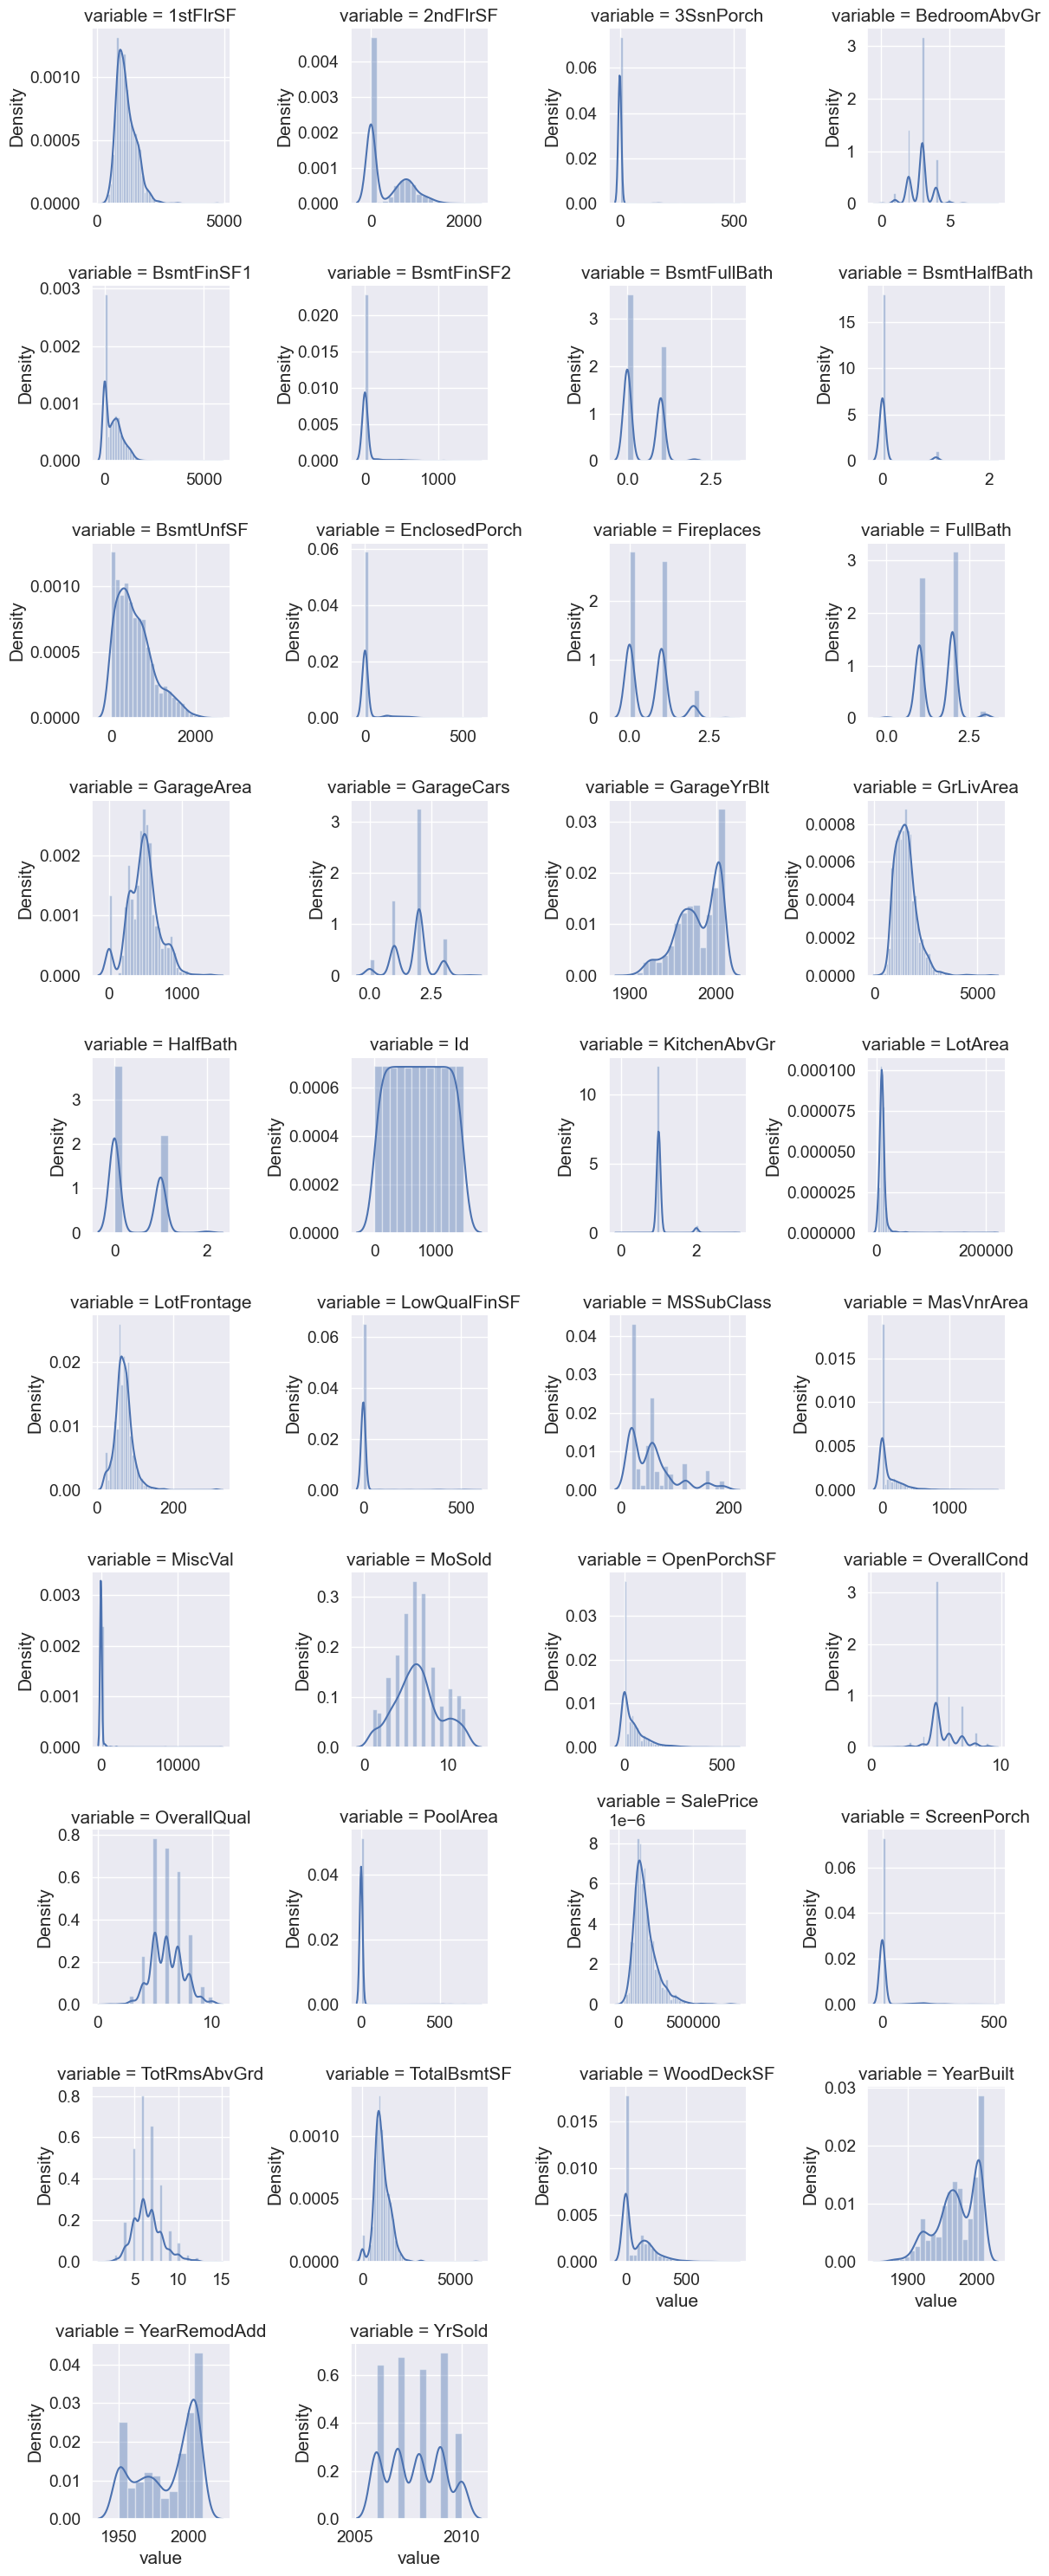

In [180]:
# Grid of distribution plots of all numerical features
f = pd.melt(train, value_vars=sorted(numerical_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

# Scatterplot
A scatterplot is a type of chart or graph that is used to display the relationship between two numerical variables. Each point on the plot represents a single observation in the data, with the horizontal (x) axis representing one variable and the vertical (y) axis representing the other variable.

Scatterplots are useful for visualizing the relationship between two variables, as they allow us to see whether there is a correlation or pattern between the variables. If there is a positive correlation between the variables, the points on the plot will tend to cluster along a diagonal line from the bottom left to the top right. If there is a negative correlation, the points will cluster along a diagonal line from the top left to the bottom right. If there is no correlation, the points will be scattered randomly across the plot.

Scatterplots can also be used to identify outliers, which are points that lie far away from the main cluster of points. Outliers can indicate errors in the data or unusual observations that may be of interest.

Scatterplots can be created manually using a spreadsheet or statistical software, or they can be automatically generated by many data analysis packages. They are commonly used in fields like science, engineering, finance, and social science to explore the relationship between two variables and to identify patterns or trends in the data.

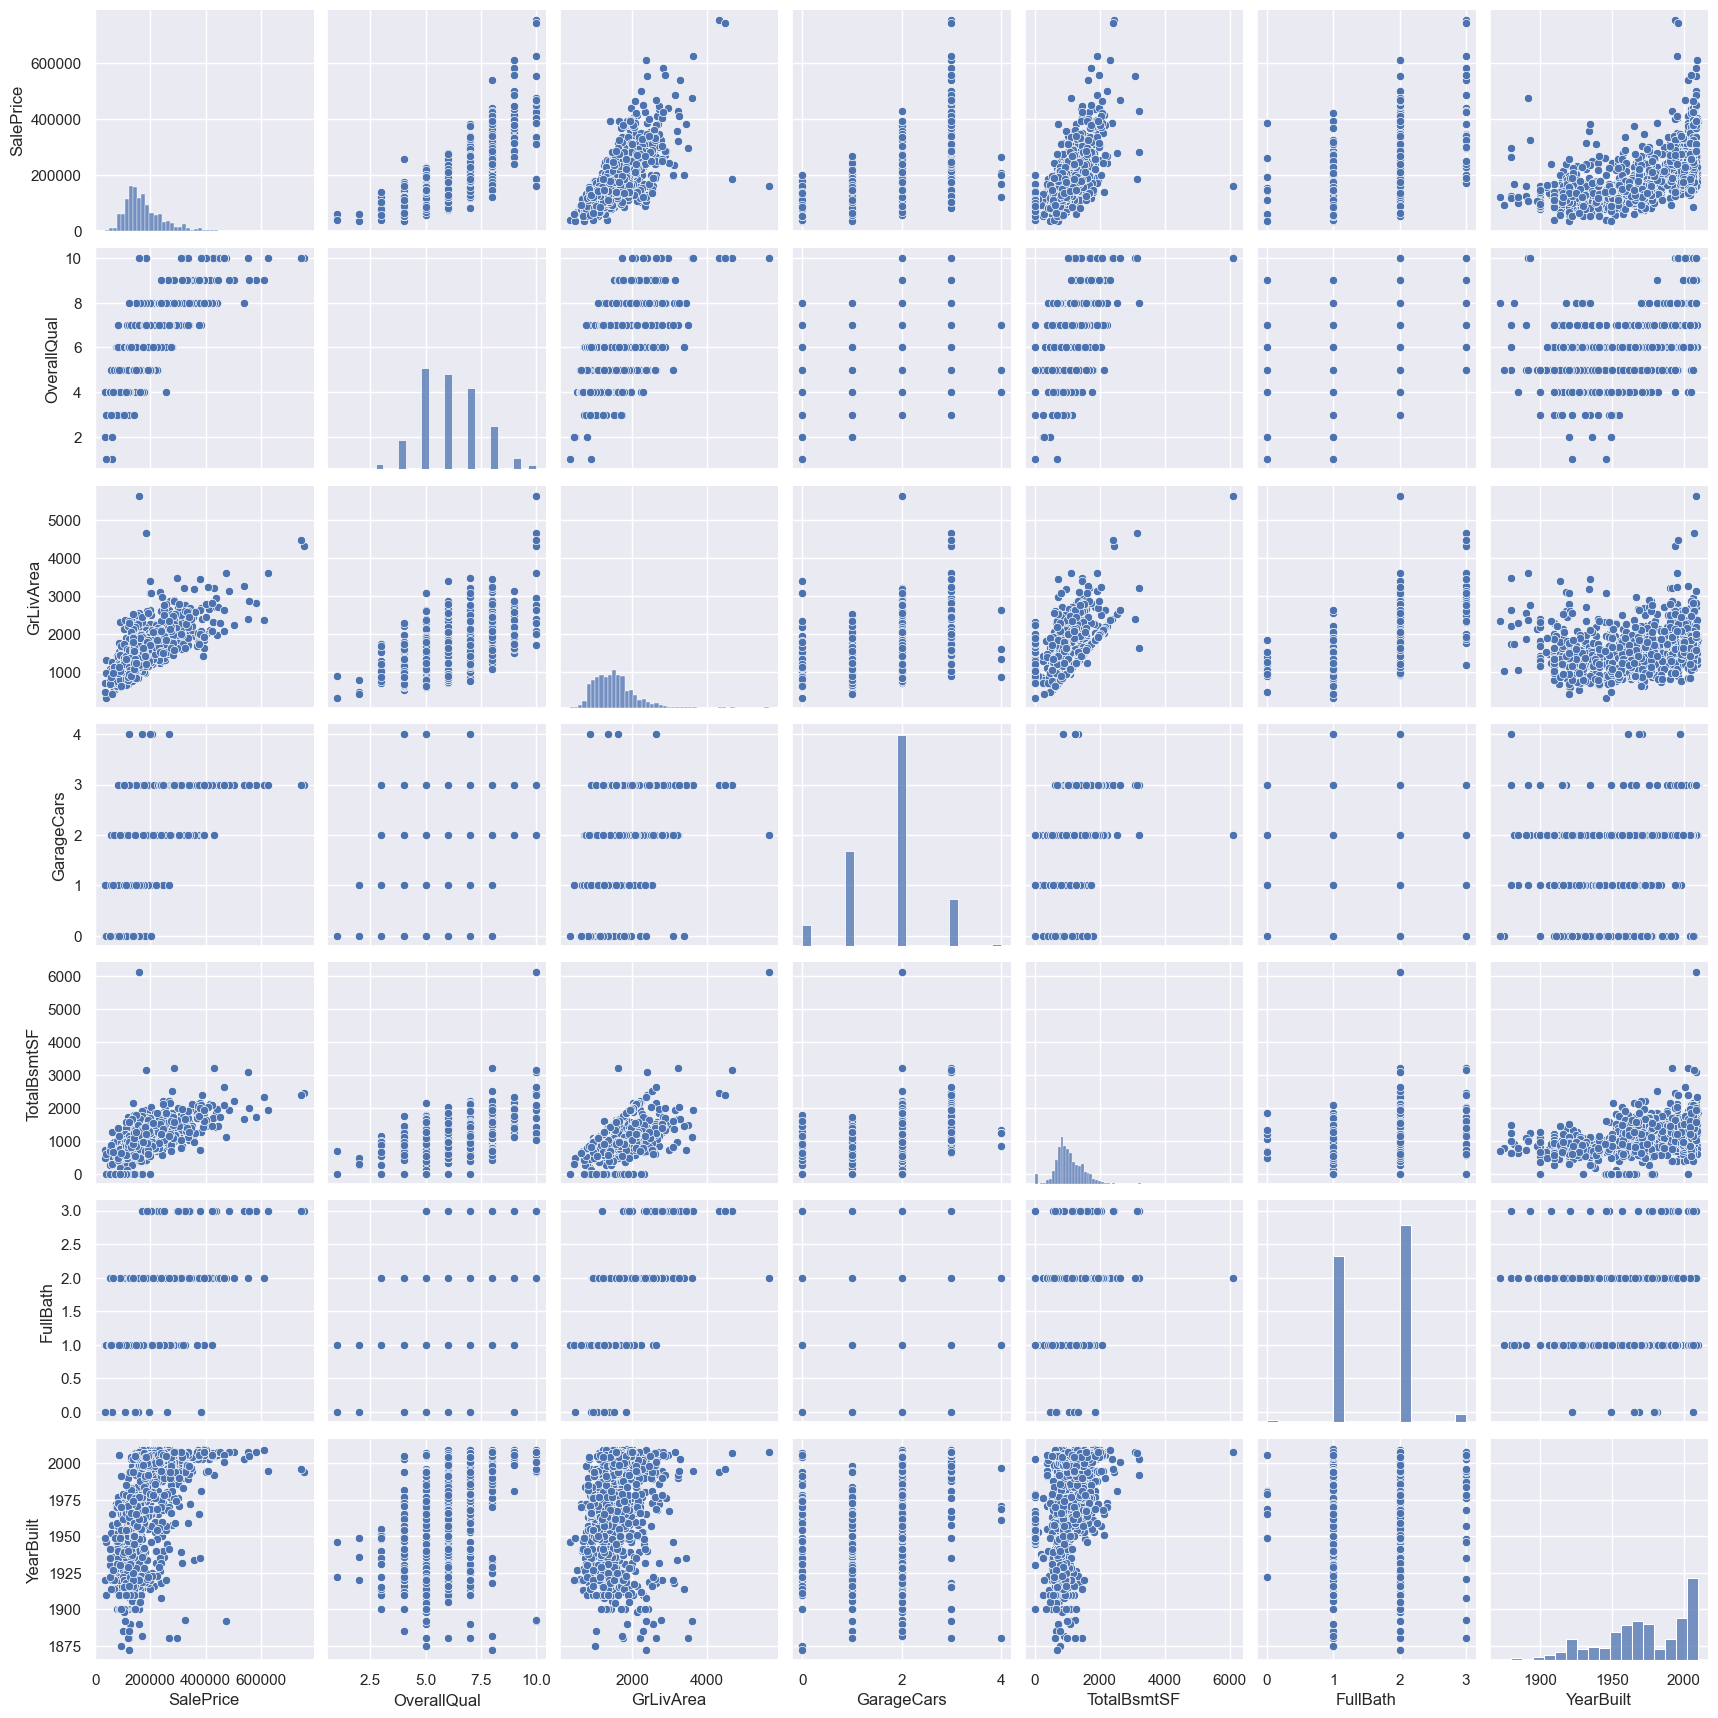

In [181]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## Analyzing SalePrice (Univariate analysis)

For this analysis we will use different plots to explore SalePrice feature.

A histogram plot, a distplot, and a scatterplot are all different types of visualizations used in data analysis and data science.

A histogram plot is a graphical representation of the distribution of a dataset. It shows how the data is spread out over a range of values, with the values binned into intervals along the x-axis and the frequency or count of observations in each interval shown on the y-axis. The resulting plot resembles a bar chart, but the bars are touching and the height of each bar represents the frequency or count of observations in that interval.

A distplot (short for distribution plot) is a type of histogram that is overlaid with a probability density function (PDF) or a kernel density estimate (KDE) curve. The PDF or KDE curve is a smoothed version of the histogram that represents the underlying distribution of the data. The resulting plot shows the shape of the distribution and can be used to identify skewness, kurtosis, and other properties of the data.

A scatterplot, as mentioned earlier, is a type of chart that is used to display the relationship between two numerical variables. Each point on the plot represents a single observation in the data, with the horizontal (x) axis representing one variable and the vertical (y) axis representing the other variable. The resulting plot shows how the two variables are related, with a positive correlation indicated by points clustering along a diagonal line from bottom left to top right, a negative correlation indicated by points clustering along a diagonal line from top left to bottom right, and no correlation indicated by points scattered randomly across the plot.

All of these types of plots are useful for exploring and visualizing different aspects of a dataset, and can help to identify patterns, trends, and outliers in the data. They are commonly used in fields like science, engineering, finance, and social science to analyze data and communicate findings to others.

In [182]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

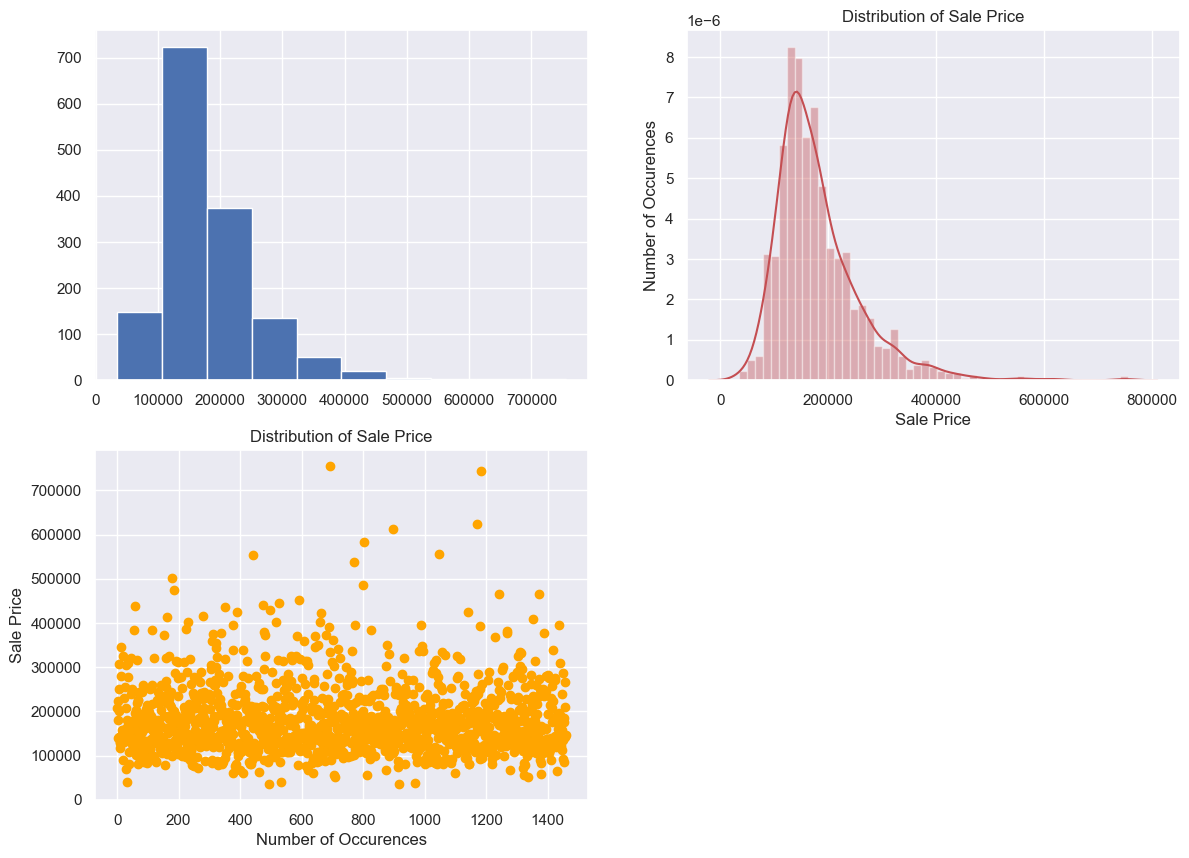

In [183]:
# Histogram -  To get an idea of the distribution.
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.hist(train['SalePrice'])

plt.subplot(2,2,2)
sns.distplot(train['SalePrice'], color="r", kde=True)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

plt.subplot(2,2,3)
plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price")

plt.show()

<Axes: xlabel='SalePrice'>

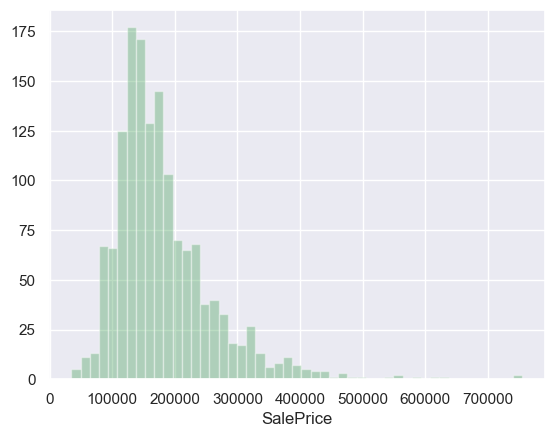

In [184]:
sns.distplot(train['SalePrice'], kde=False, color="g")

# Skew and Kurtosis

Skewness and kurtosis are two statistical measures that describe the shape of a distribution.

Skewness refers to the degree of asymmetry in a distribution. If a distribution is skewed to the left, it means that the tail of the distribution is longer on the left side, and the majority of the observations are clustered on the right side. If a distribution is skewed to the right, it means that the tail of the distribution is longer on the right side, and the majority of the observations are clustered on the left side. If a distribution is symmetrical, it means that the observations are evenly distributed on both sides of the mean, and there is no skewness.

Kurtosis, on the other hand, refers to the degree of peakedness or flatness in a distribution. If a distribution is leptokurtic, it means that it is more peaked than a normal distribution, with more observations clustered in the center and fewer in the tails. If a distribution is platykurtic, it means that it is flatter than a normal distribution, with fewer observations in the center and more in the tails. If a distribution has a normal kurtosis, it means that it is similar to a normal distribution in terms of its shape.

Both skewness and kurtosis can have an impact on the interpretation of data, and they are commonly used in statistical analysis to describe the shape of a distribution and to test hypotheses about the data. In addition, these measures can be used to identify outliers and to assess the suitability of different statistical models for the data.



In [185]:
print("Skew:",      train['SalePrice'].skew())
print("Kurtosis: ", train['SalePrice'].kurtosis())

Skew: 1.8828757597682129
Kurtosis:  6.536281860064529


Distribution of numerical features

# Distribution of numerical features (Histogram plots)

Showing histograms of all features in machine learning can be useful for several reasons:

    1. To visualize the distribution of the data: Histograms can help to show the shape of the distribution of each feature, which can provide insights into the underlying patterns and characteristics of the data. For example, if a feature is normally distributed, it may be appropriate to use parametric statistical methods, while if it is skewed or has a heavy tail, non-parametric methods may be more appropriate.

    2. To identify outliers: Histograms can also help to identify outliers, which are values that are significantly different from the majority of the data points. Outliers can affect the results of a machine learning model and may need to be handled separately. By examining histograms of each feature, it may be possible to identify outliers and decide how to handle them.

    3. To preprocess the data: Histograms can also be used to preprocess the data before training a machine learning model. For example, if a feature has a skewed distribution, it may be appropriate to transform the data using a log or power transformation to make it more normally distributed. Similarly, if a feature has missing values, it may be possible to impute them using methods such as mean imputation or regression imputation.

    4. To compare different features: Finally, histograms can be used to compare different features and to identify relationships between them. For example, if two features have similar distributions, it may be possible to combine them or to use one as a proxy for the other. Similarly, if two features have different distributions, it may be possible to use feature selection methods to identify which one is more important for the machine learning model.

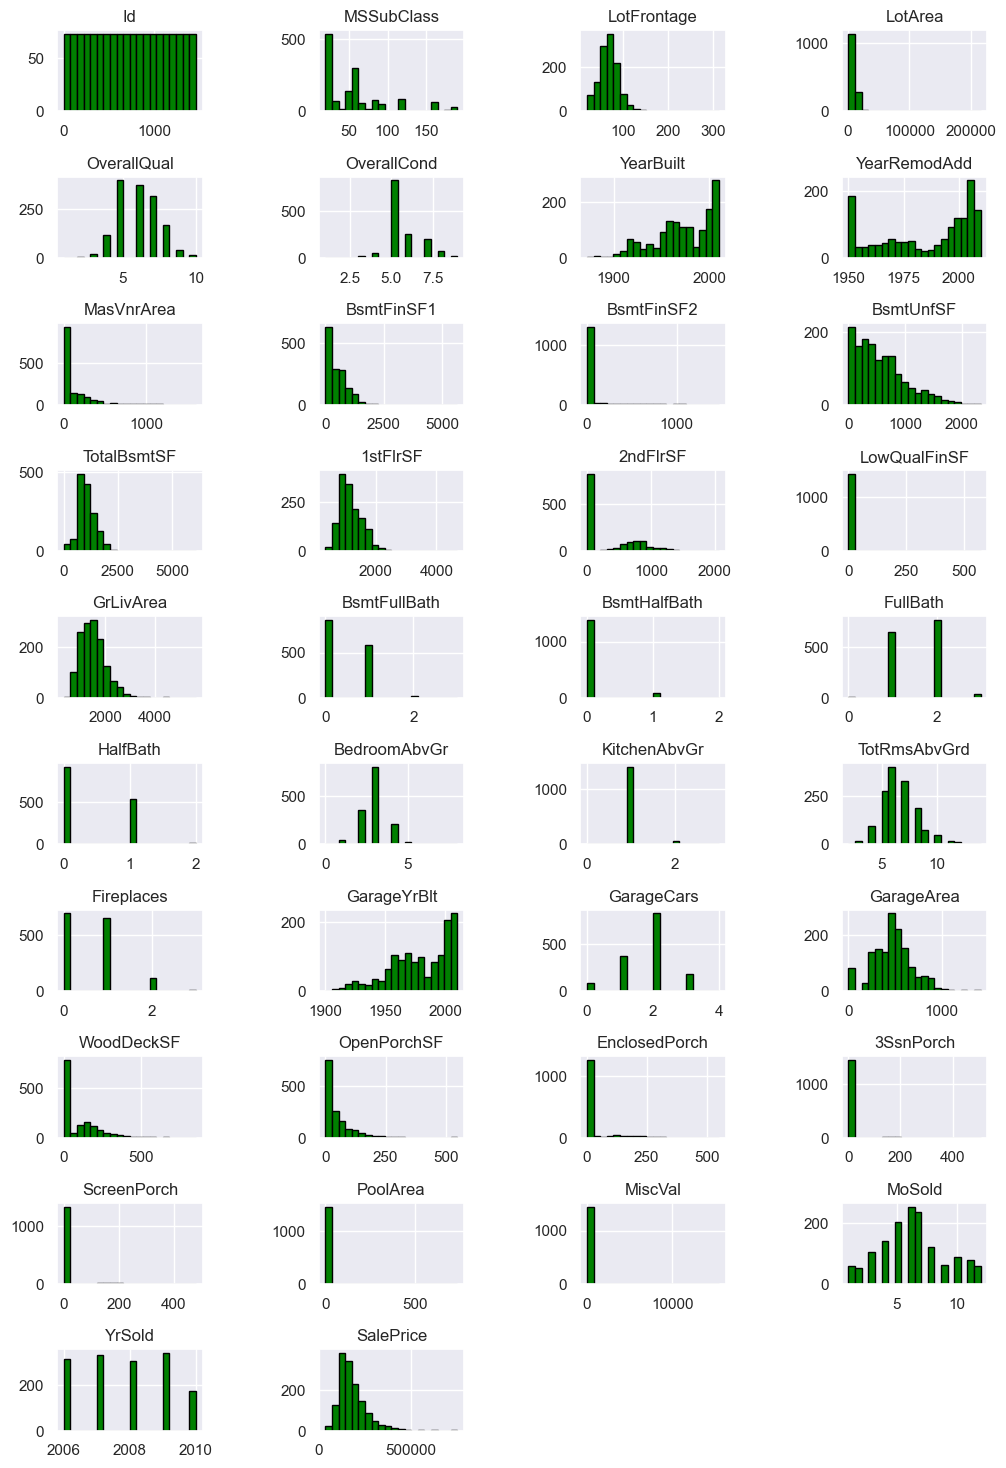

In [186]:
train[numerical_features].hist(bins=20, figsize=(12, 22), edgecolor="black", color="green",
                    layout=(12, 4))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

# Correlation between SalePrice and numerical features

Correlation between the target variable and features is important in machine learning because it can help to identify which features are most predictive of the target variable. This information can be used to improve the accuracy of a machine learning model and to make better predictions on new data.

Correlation is a measure of the linear relationship between two variables. When we calculate the correlation between the target variable and each feature, we can get an idea of how much each feature is related to the target variable. If a feature has a high positive correlation with the target variable, it means that as the value of the feature increases, the value of the target variable also tends to increase. Conversely, if a feature has a high negative correlation with the target variable, it means that as the value of the feature increases, the value of the target variable tends to decrease.

By examining the correlation between the target variable and each feature, we can identify which features are most predictive of the target variable. These features can then be used to train a machine learning model that can accurately predict the target variable on new data. Additionally, by identifying the most important features, we can reduce the dimensionality of the data, which can help to improve the computational efficiency of the machine learning model.

However, it is important to note that correlation does not necessarily imply causation. Just because two variables are correlated, it does not mean that one causes the other. Therefore, it is important to use caution when interpreting the results of correlation analysis and to use other methods, such as causal inference or experimental design, to establish causation.

In [187]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h',palette = "rocket")
    #sns.color_palette("rocket")

Spearman correlation is a statistical method that measures the strength and direction of the relationship between two variables. Unlike Pearson correlation, which measures the linear relationship between two variables, Spearman correlation measures the monotonic relationship between two variables.

Monotonic relationship is a relationship between two variables where the variables tend to move in the same direction, but not necessarily at a constant rate. For example, if we have two variables, X and Y, and as X increases, Y tends to increase, but not necessarily at a constant rate, then we have a monotonic relationship between X and Y.

Spearman correlation is often used when the relationship between two variables is not linear, or when one or both variables are not normally distributed. It is calculated by first ranking the values of each variable, and then calculating the Pearson correlation between the ranks of the two variables.

Spearman correlation ranges from -1 to +1, with values close to -1 indicating a strong negative monotonic relationship, values close to +1 indicating a strong positive monotonic relationship, and values close to 0 indicating no monotonic relationship.

Spearman correlation can be useful in machine learning when we want to measure the relationship between two variables that may not have a linear relationship. It can also be used to identify variables that are highly correlated, which can be a sign of multicollinearity, a condition where two or more variables are highly correlated and may lead to overfitting in a machine learning model.


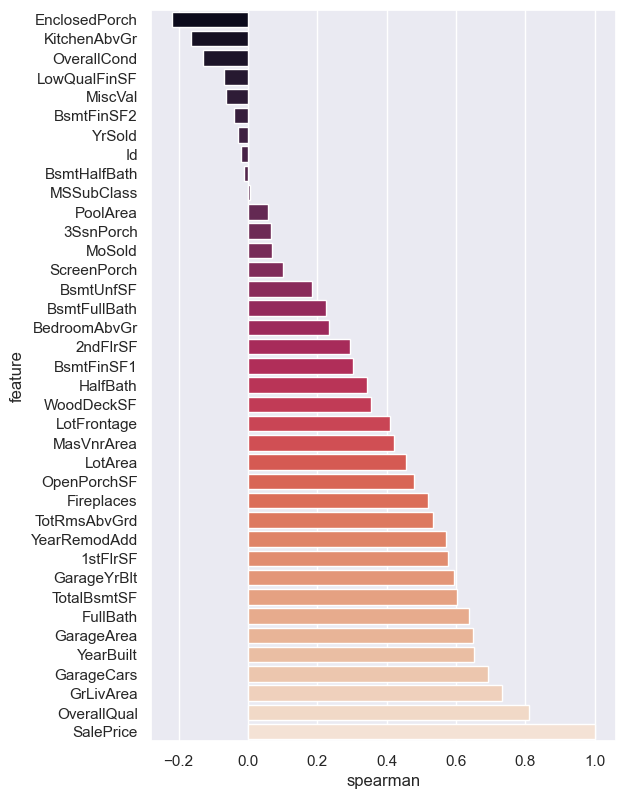

In [188]:
spearman(train, numerical_features)

In [189]:
train.corr(method='spearman')

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.019226    -0.033335 -0.005364    -0.028771   
MSSubClass     0.019226    1.000000    -0.314265 -0.269570     0.108065   
LotFrontage   -0.033335   -0.314265     1.000000  0.649633     0.254952   
LotArea       -0.005364   -0.269570     0.649633  1.000000     0.233303   
OverallQual   -0.028771    0.108065     0.254952  0.233303     1.000000   
OverallCond    0.003622   -0.071770    -0.083242 -0.046912    -0.177521   
YearBuilt     -0.005130    0.035848     0.194510  0.103385     0.647392   
YearRemodAdd  -0.011680    0.006802     0.116772  0.075158     0.557723   
MasVnrArea    -0.035507    0.025035     0.258906  0.177539     0.413500   
BsmtFinSF1    -0.013038   -0.107629     0.154014  0.171995     0.132957   
BsmtFinSF2    -0.006736   -0.083871     0.052516  0.072019    -0.117560   
BsmtUnfSF     -0.009509   -0.117603     0.119436  0.077830     0.272939   
TotalBsmtSF   -0.033187   -0.318897     0.386206  0.366197     0.459915   
1stFlrSF      -0.000616   -0.278318     0.427678  0.443858     0.408730   
2ndFlrSF       0.009455    0.487749     0.055111  0.119356     0.289561   
LowQualFinSF  -0.028463    0.075794    -0.030230 -0.020255    -0.034029   
GrLivArea      0.002812    0.203576     0.375844  0.449040     0.603262   
BsmtFullBath   0.004662   -0.042017     0.085990  0.095609     0.098034   
BsmtHalfBath  -0.021475    0.002480    -0.003854  0.045970    -0.050598   
FullBath       0.007269    0.194912     0.220234  0.235377     0.576372   
HalfBath       0.002564    0.282632     0.096777  0.142658     0.298455   
BedroomAbvGr   0.041650    0.068763     0.327679  0.337788     0.121517   
KitchenAbvGr   0.007574    0.277162     0.002231 -0.022752    -0.192439   
TotRmsAbvGrd   0.025888    0.165825     0.365999  0.405924     0.427806   
Fireplaces    -0.013644    0.019480     0.245315  0.350198     0.420626   
GarageYrBlt   -0.000194    0.079268     0.115694  0.041796     0.618193   
GarageCars     0.013301    0.024226     0.351756  0.340195     0.608756   
GarageArea     0.006505   -0.047133     0.378052  0.367153     0.541552   
WoodDeckSF    -0.043239    0.023370     0.109288  0.184285     0.259439   
OpenPorchSF   -0.003225    0.031900     0.178073  0.176965     0.435046   
EnclosedPorch -0.006758    0.011023    -0.095811 -0.066563    -0.162434   
3SsnPorch     -0.036706   -0.035830     0.063960  0.062282     0.032903   
ScreenPorch    0.005962   -0.021673     0.043849  0.092316     0.046335   
PoolArea       0.055555    0.033250     0.084534  0.084460     0.056667   
MiscVal       -0.043383   -0.032840     0.024198  0.059297    -0.088019   
MoSold         0.019018    0.018403     0.025758  0.006423     0.061455   
YrSold         0.001526   -0.027401     0.003461 -0.027473    -0.025464   
SalePrice     -0.018546    0.007192     0.409076  0.456461     0.809829   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.003622  -0.005130     -0.011680   -0.035507   -0.013038   
MSSubClass       -0.071770   0.035848      0.006802    0.025035   -0.107629   
LotFrontage      -0.083242   0.194510      0.116772    0.258906    0.154014   
LotArea          -0.046912   0.103385      0.075158    0.177539    0.171995   
OverallQual      -0.177521   0.647392      0.557723    0.413500    0.132957   
OverallCond       1.000000  -0.416964     -0.041464   -0.179187   -0.011087   
YearBuilt        -0.416964   1.000000      0.684388    0.402349    0.189645   
YearRemodAdd     -0.041464   0.684388      1.000000    0.234333    0.063353   
MasVnrArea       -0.179187   0.402349      0.234333    1.000000    0.241565   
BsmtFinSF1       -0.011087   0.189645      0.063353    0.241565    1.000000   
BsmtFinSF2        0.102471  -0.111692     -0.126086   -0.061342    0.050398   
BsmtUnfSF        -0.128270   0.139014      0.176921    0.075561   -0.573638   
TotalBsmtSF      -0.217375   0.427187      0.299042    0.360104    0

# Spearman heatmap

A heatmap plot is a graphical representation of a matrix of values, where the values are represented by colors. In machine learning, a heatmap plot is often used to visualize the correlation between variables, where the values of the matrix represent the correlation coefficients.

The heatmap plot is created by mapping the values of the matrix to a color scale, where low values are represented by a lighter color and high values are represented by a darker color. This makes it easy to visually identify the variables that are highly correlated, as they will be represented by dark colors.

Heatmap plots are important in machine learning because they can help us to identify variables that are highly correlated with each other. When two variables are highly correlated, it can be a sign of multicollinearity, which is a condition where two or more variables are highly correlated and may lead to overfitting in a machine learning model. In this case, we may want to consider removing one of the variables from our analysis in order to reduce the risk of overfitting.

Heatmap plots can also be used to identify variables that are most strongly correlated with the target variable. By focusing on these variables, we can improve the accuracy of our machine learning model and make better predictions on new data.

Overall, the heatmap plot is a useful tool in machine learning for visualizing the correlation between variables, identifying variables that are highly correlated with each other, and identifying variables that are most strongly correlated with the target variable.


<Axes: >

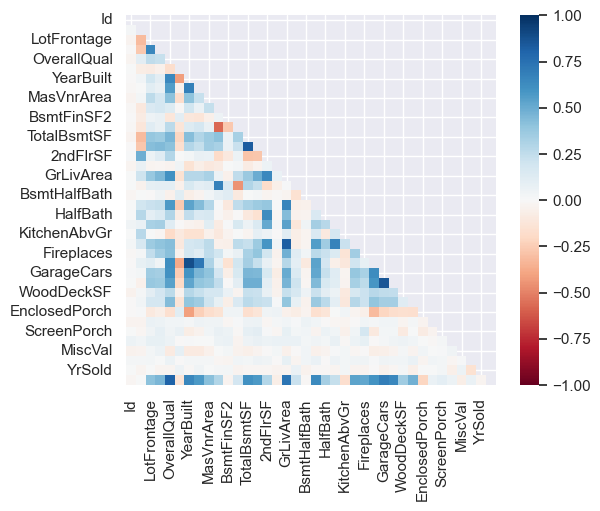

In [190]:
mask = np.triu(np.ones_like(train.corr(method='spearman')))
sns.heatmap(train.corr(method='spearman'), cmap="RdBu",vmin=-1, vmax=1,square=True, mask = mask)

# Plot variables with more than 5% missing values

Plotting variables with more than 5% missing values is important in machine learning because missing values can have a significant impact on the performance of our models. When we have missing values in our data, we have to decide how to handle them, and this can have implications for the accuracy and reliability of our models.

By plotting variables with more than 5% missing values, we can get a sense of how much missing data we have and whether there are any patterns or trends in the missing data. This can help us to make informed decisions about how to handle the missing data.

For example, if we have a variable with a large number of missing values, we may want to consider dropping that variable from our analysis, especially if the variable is not likely to be important in our model. Alternatively, we may want to consider imputing the missing values using a technique such as mean imputation, median imputation, or hot-deck imputation.

By visualizing the missing data in our variables, we can also identify any patterns or trends that may help us to impute the missing values more accurately. For example, if the missing data is clustered around a certain range of values, we may want to impute the missing values using a value from that range, rather than using the mean or median value.

Overall, plotting variables with more than 5% missing values is important in machine learning because it can help us to make informed decisions about how to handle missing data, which can have a significant impact on the performance of our models.

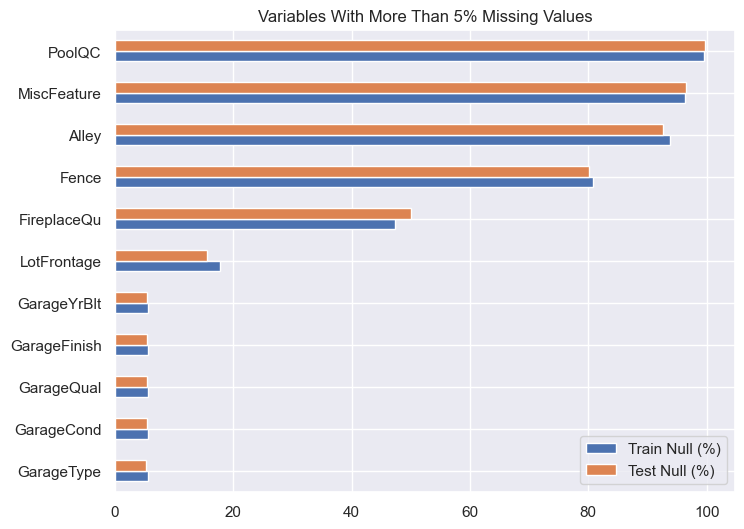

In [191]:
# Plot variables with more than 5% missing values
missing.loc[missing["Train Null (%)"] > 5, ["Train Null (%)", "Test Null (%)"]].iloc[::-1].plot.barh(figsize=(8,6))
plt.title("Variables With More Than 5% Missing Values")
plt.show()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.019226    -0.033335 -0.005364    -0.028771   
MSSubClass     0.019226    1.000000    -0.314265 -0.269570     0.108065   
LotFrontage   -0.033335   -0.314265     1.000000  0.649633     0.254952   
LotArea       -0.005364   -0.269570     0.649633  1.000000     0.233303   
OverallQual   -0.028771    0.108065     0.254952  0.233303     1.000000   
OverallCond    0.003622   -0.071770    -0.083242 -0.046912    -0.177521   
YearBuilt     -0.005130    0.035848     0.194510  0.103385     0.647392   
YearRemodAdd  -0.011680    0.006802     0.116772  0.075158     0.557723   
MasVnrArea    -0.035507    0.025035     0.258906  0.177539     0.413500   
BsmtFinSF1    -0.013038   -0.107629     0.154014  0.171995     0.132957   
BsmtFinSF2    -0.006736   -0.083871     0.052516  0.072019    -0.117560   
BsmtUnfSF     -0.009509   -0.117603     0.119436  0.077830     0.272939   
TotalBsmtSF   -0.033187   -0.318897     0.386206  0.366197     0.459915   
1stFlrSF      -0.000616   -0.278318     0.427678  0.443858     0.408730   
2ndFlrSF       0.009455    0.487749     0.055111  0.119356     0.289561   
LowQualFinSF  -0.028463    0.075794    -0.030230 -0.020255    -0.034029   
GrLivArea      0.002812    0.203576     0.375844  0.449040     0.603262   
BsmtFullBath   0.004662   -0.042017     0.085990  0.095609     0.098034   
BsmtHalfBath  -0.021475    0.002480    -0.003854  0.045970    -0.050598   
FullBath       0.007269    0.194912     0.220234  0.235377     0.576372   
HalfBath       0.002564    0.282632     0.096777  0.142658     0.298455   
BedroomAbvGr   0.041650    0.068763     0.327679  0.337788     0.121517   
KitchenAbvGr   0.007574    0.277162     0.002231 -0.022752    -0.192439   
TotRmsAbvGrd   0.025888    0.165825     0.365999  0.405924     0.427806   
Fireplaces    -0.013644    0.019480     0.245315  0.350198     0.420626   
GarageYrBlt   -0.000194    0.079268     0.115694  0.041796     0.618193   
GarageCars     0.013301    0.024226     0.351756  0.340195     0.608756   
GarageArea     0.006505   -0.047133     0.378052  0.367153     0.541552   
WoodDeckSF    -0.043239    0.023370     0.109288  0.184285     0.259439   
OpenPorchSF   -0.003225    0.031900     0.178073  0.176965     0.435046   
EnclosedPorch -0.006758    0.011023    -0.095811 -0.066563    -0.162434   
3SsnPorch     -0.036706   -0.035830     0.063960  0.062282     0.032903   
ScreenPorch    0.005962   -0.021673     0.043849  0.092316     0.046335   
PoolArea       0.055555    0.033250     0.084534  0.084460     0.056667   
MiscVal       -0.043383   -0.032840     0.024198  0.059297    -0.088019   
MoSold         0.019018    0.018403     0.025758  0.006423     0.061455   
YrSold         0.001526   -0.027401     0.003461 -0.027473    -0.025464   
SalePrice     -0.018546    0.007192     0.409076  0.456461     0.809829   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.003622  -0.005130     -0.011680   -0.035507   -0.013038   
MSSubClass       -0.071770   0.035848      0.006802    0.025035   -0.107629   
LotFrontage      -0.083242   0.194510      0.116772    0.258906    0.154014   
LotArea          -0.046912   0.103385      0.075158    0.177539    0.171995   
OverallQual      -0.177521   0.647392      0.557723    0.413500    0.132957   
OverallCond       1.000000  -0.416964     -0.041464   -0.179187   -0.011087   
YearBuilt        -0.416964   1.000000      0.684388    0.402349    0.189645   
YearRemodAdd     -0.041464   0.684388      1.000000    0.234333    0.063353   
MasVnrArea       -0.179187   0.402349      0.234333    1.000000    0.241565   
BsmtFinSF1       -0.011087   0.189645      0.063353    0.241565    1.000000   
BsmtFinSF2        0.102471  -0.111692     -0.126086   -0.061342    0.050398   
BsmtUnfSF        -0.128270   0.139014      0.176921    0.075561   -0.573638   
TotalBsmtSF      -0.217375   0.427187      0.299042    0.360104    0

<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

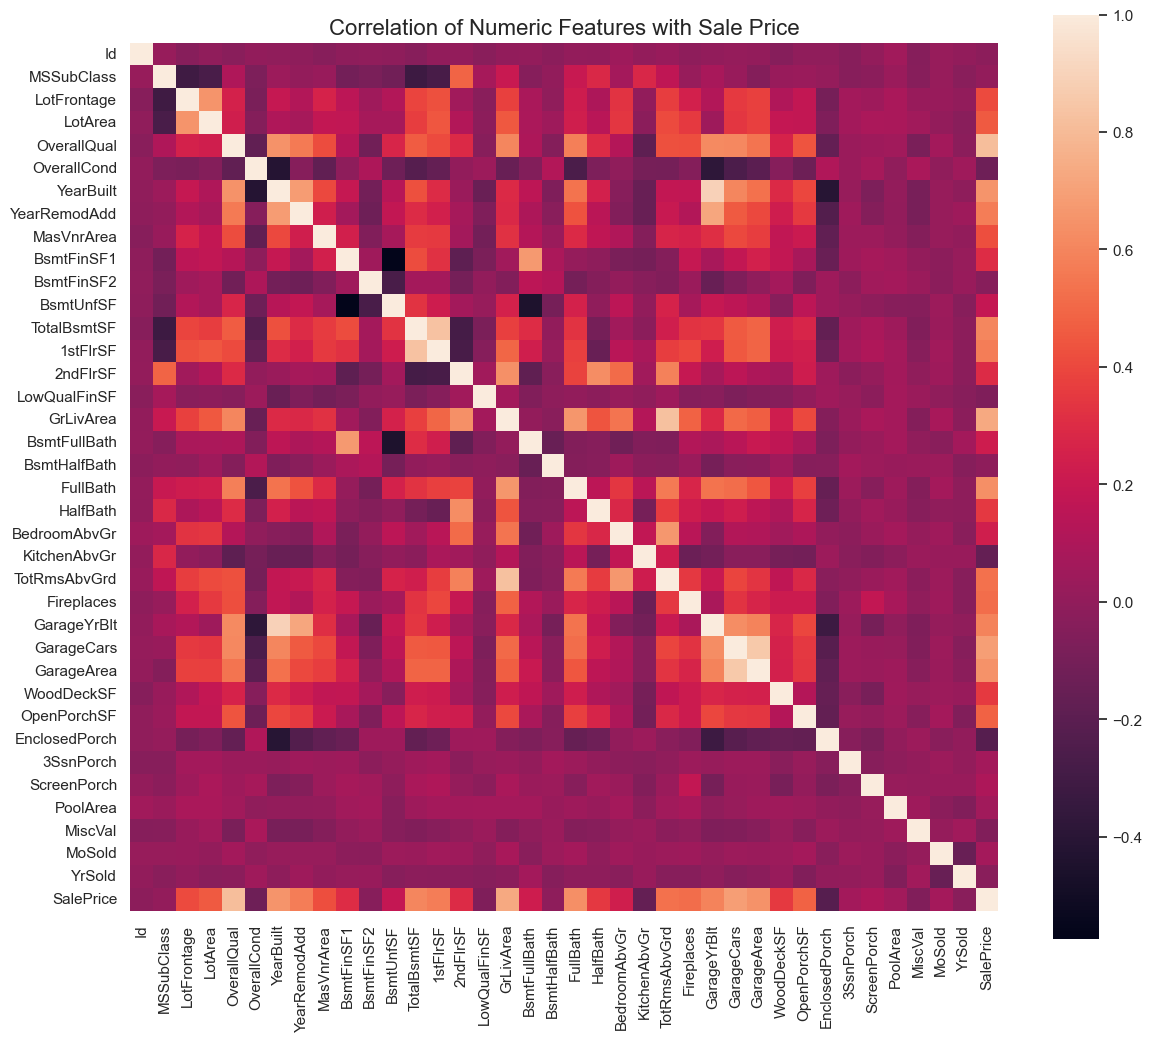

In [192]:
correlation = train[numerical_features].corr(method='spearman')
display(correlation)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=1)

# Correlation clustermap
A cluster map is a type of heatmap that is used to visualize the correlation between features in a dataset. The cluster map arranges the features in such a way that highly correlated features are placed closer to each other, and less correlated features are placed farther away. This creates clusters of highly correlated features that are easy to identify and analyze.

Cluster maps are important in feature engineering because they can help us to identify groups of related features that may be useful in creating new features or in reducing the dimensionality of our dataset. By identifying highly correlated features, we can reduce redundancy in our dataset and improve the accuracy and efficiency of our models.

For example, if we have a dataset with many highly correlated features, we may want to consider selecting only one or two features from each cluster of highly correlated features, and using those features in our models. This can reduce the dimensionality of our dataset and improve the performance of our models.

Cluster maps can also help us to identify features that are not highly correlated with other features, which may indicate that these features are not very useful in predicting the target variable. By identifying these features, we can remove them from our dataset and focus on the features that are most predictive.

Overall, cluster maps are an important tool in feature engineering because they can help us to identify groups of highly correlated features, reduce the dimensionality of our dataset, and improve the accuracy and efficiency of our machine learning models.

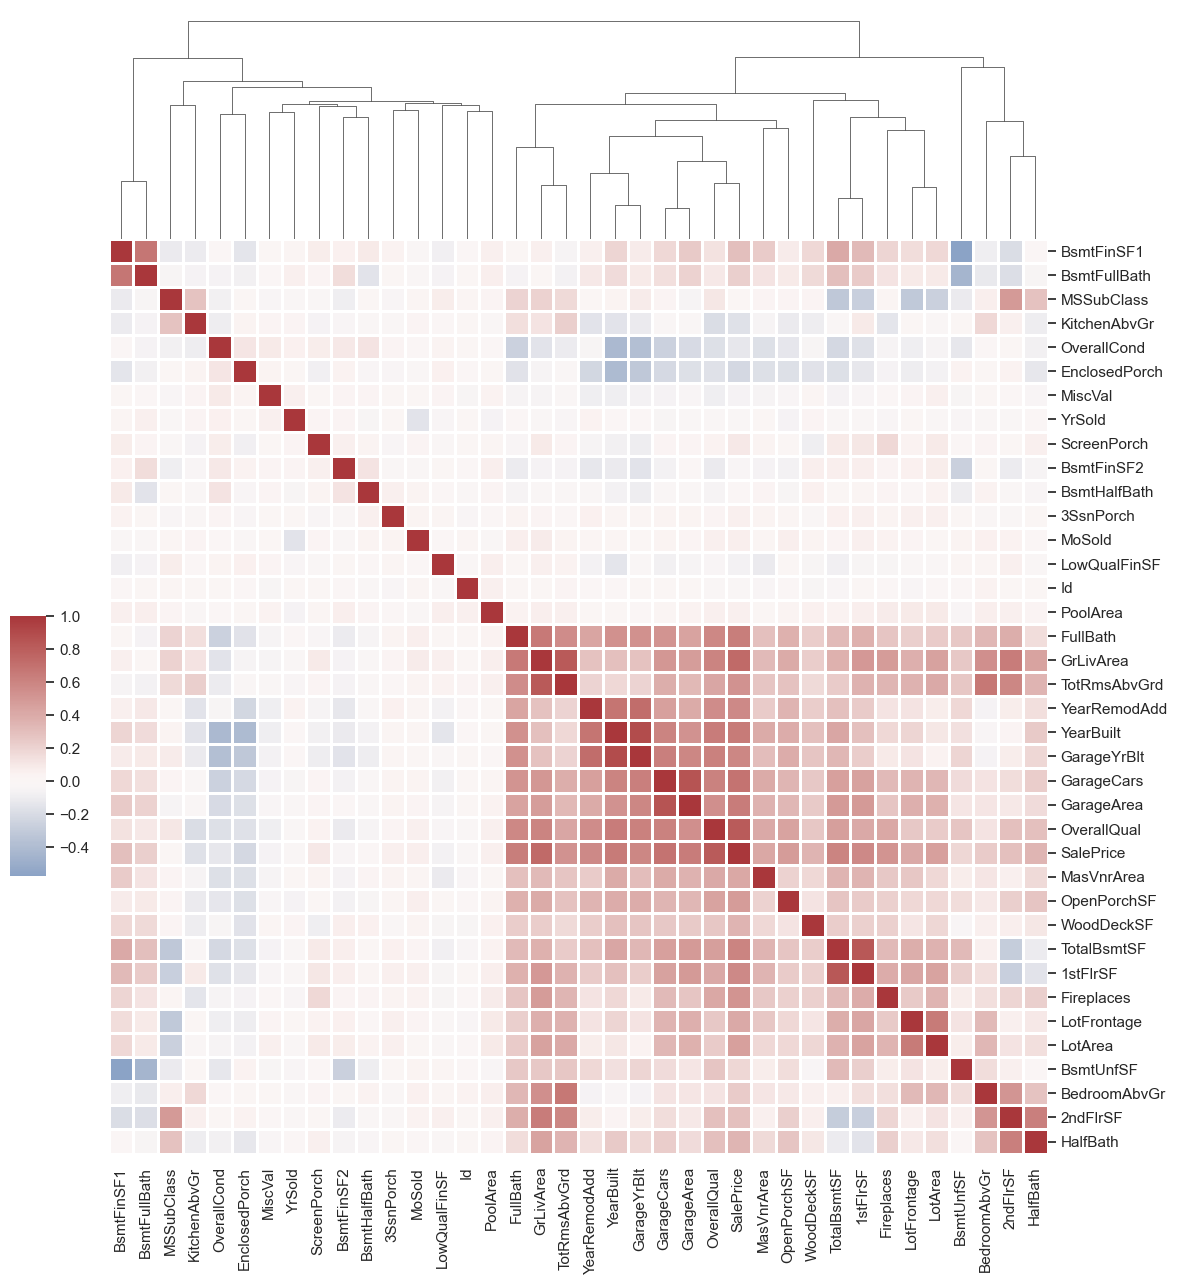

In [193]:
sns.clustermap(train[numerical_features].corr(method='spearman'), center=0,
                   cmap="vlag",annot = False,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13)).ax_row_dendrogram.remove()

In [194]:
numeric_feats = train.select_dtypes(include=[np.number])

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.019226    -0.033335 -0.005364    -0.028771   
MSSubClass     0.019226    1.000000    -0.314265 -0.269570     0.108065   
LotFrontage   -0.033335   -0.314265     1.000000  0.649633     0.254952   
LotArea       -0.005364   -0.269570     0.649633  1.000000     0.233303   
OverallQual   -0.028771    0.108065     0.254952  0.233303     1.000000   
OverallCond    0.003622   -0.071770    -0.083242 -0.046912    -0.177521   
YearBuilt     -0.005130    0.035848     0.194510  0.103385     0.647392   
YearRemodAdd  -0.011680    0.006802     0.116772  0.075158     0.557723   
MasVnrArea    -0.035507    0.025035     0.258906  0.177539     0.413500   
BsmtFinSF1    -0.013038   -0.107629     0.154014  0.171995     0.132957   
BsmtFinSF2    -0.006736   -0.083871     0.052516  0.072019    -0.117560   
BsmtUnfSF     -0.009509   -0.117603     0.119436  0.077830     0.272939   
TotalBsmtSF   -0.033187   -0.318897     0.386206  0.366197     0.459915   
1stFlrSF      -0.000616   -0.278318     0.427678  0.443858     0.408730   
2ndFlrSF       0.009455    0.487749     0.055111  0.119356     0.289561   
LowQualFinSF  -0.028463    0.075794    -0.030230 -0.020255    -0.034029   
GrLivArea      0.002812    0.203576     0.375844  0.449040     0.603262   
BsmtFullBath   0.004662   -0.042017     0.085990  0.095609     0.098034   
BsmtHalfBath  -0.021475    0.002480    -0.003854  0.045970    -0.050598   
FullBath       0.007269    0.194912     0.220234  0.235377     0.576372   
HalfBath       0.002564    0.282632     0.096777  0.142658     0.298455   
BedroomAbvGr   0.041650    0.068763     0.327679  0.337788     0.121517   
KitchenAbvGr   0.007574    0.277162     0.002231 -0.022752    -0.192439   
TotRmsAbvGrd   0.025888    0.165825     0.365999  0.405924     0.427806   
Fireplaces    -0.013644    0.019480     0.245315  0.350198     0.420626   
GarageYrBlt   -0.000194    0.079268     0.115694  0.041796     0.618193   
GarageCars     0.013301    0.024226     0.351756  0.340195     0.608756   
GarageArea     0.006505   -0.047133     0.378052  0.367153     0.541552   
WoodDeckSF    -0.043239    0.023370     0.109288  0.184285     0.259439   
OpenPorchSF   -0.003225    0.031900     0.178073  0.176965     0.435046   
EnclosedPorch -0.006758    0.011023    -0.095811 -0.066563    -0.162434   
3SsnPorch     -0.036706   -0.035830     0.063960  0.062282     0.032903   
ScreenPorch    0.005962   -0.021673     0.043849  0.092316     0.046335   
PoolArea       0.055555    0.033250     0.084534  0.084460     0.056667   
MiscVal       -0.043383   -0.032840     0.024198  0.059297    -0.088019   
MoSold         0.019018    0.018403     0.025758  0.006423     0.061455   
YrSold         0.001526   -0.027401     0.003461 -0.027473    -0.025464   
SalePrice     -0.018546    0.007192     0.409076  0.456461     0.809829   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.003622  -0.005130     -0.011680   -0.035507   -0.013038   
MSSubClass       -0.071770   0.035848      0.006802    0.025035   -0.107629   
LotFrontage      -0.083242   0.194510      0.116772    0.258906    0.154014   
LotArea          -0.046912   0.103385      0.075158    0.177539    0.171995   
OverallQual      -0.177521   0.647392      0.557723    0.413500    0.132957   
OverallCond       1.000000  -0.416964     -0.041464   -0.179187   -0.011087   
YearBuilt        -0.416964   1.000000      0.684388    0.402349    0.189645   
YearRemodAdd     -0.041464   0.684388      1.000000    0.234333    0.063353   
MasVnrArea       -0.179187   0.402349      0.234333    1.000000    0.241565   
BsmtFinSF1       -0.011087   0.189645      0.063353    0.241565    1.000000   
BsmtFinSF2        0.102471  -0.111692     -0.126086   -0.061342    0.050398   
BsmtUnfSF        -0.128270   0.139014      0.176921    0.075561   -0.573638   
TotalBsmtSF      -0.217375   0.427187      0.299042    0.360104    0

<Axes: title={'center': 'Correlation of Numeric Features with Sale Price'}>

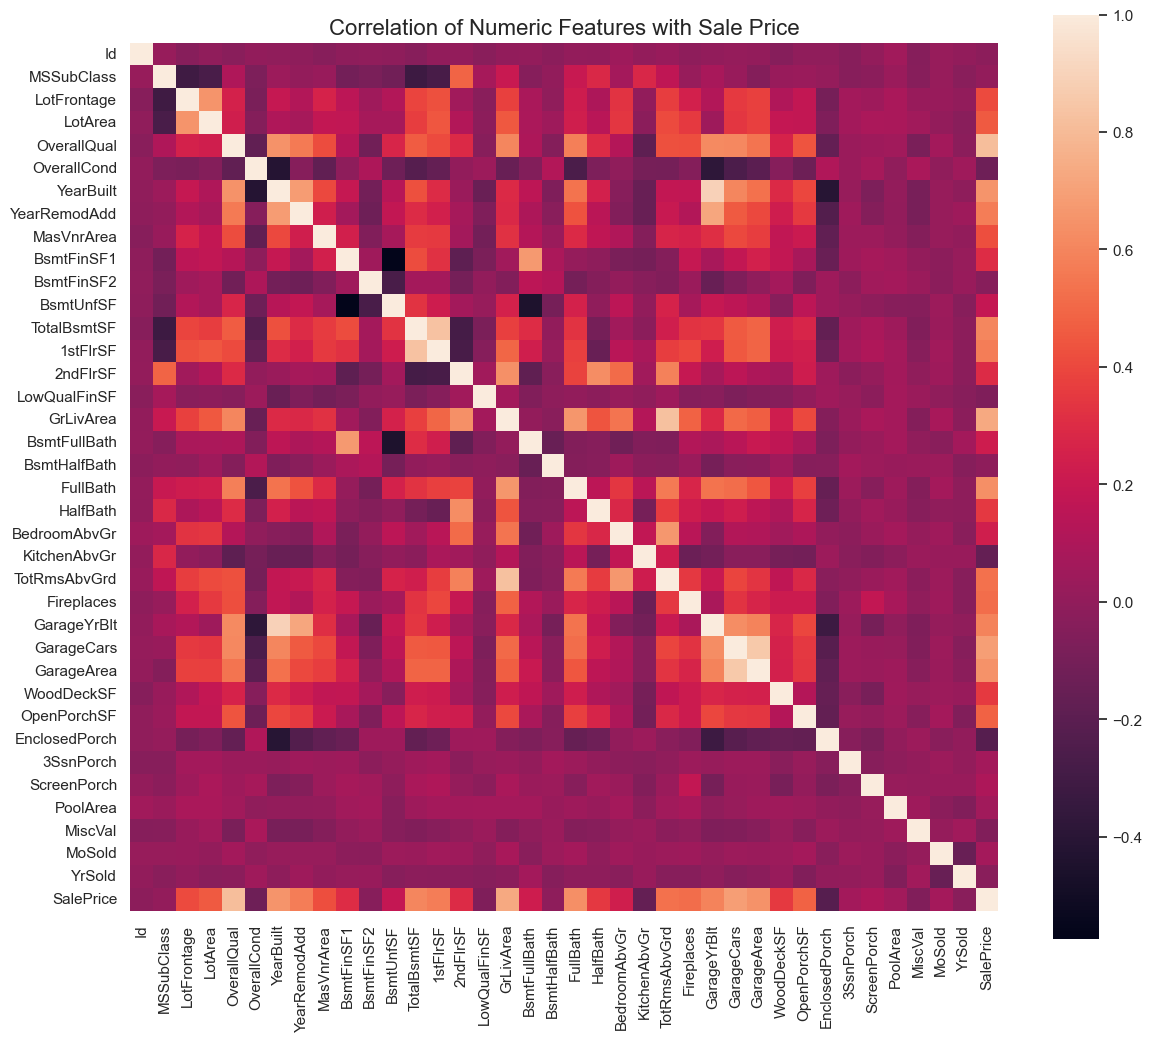

In [195]:
correlation = numeric_feats.corr(method='spearman')
display(correlation)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of Numeric Features with Sale Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=1)

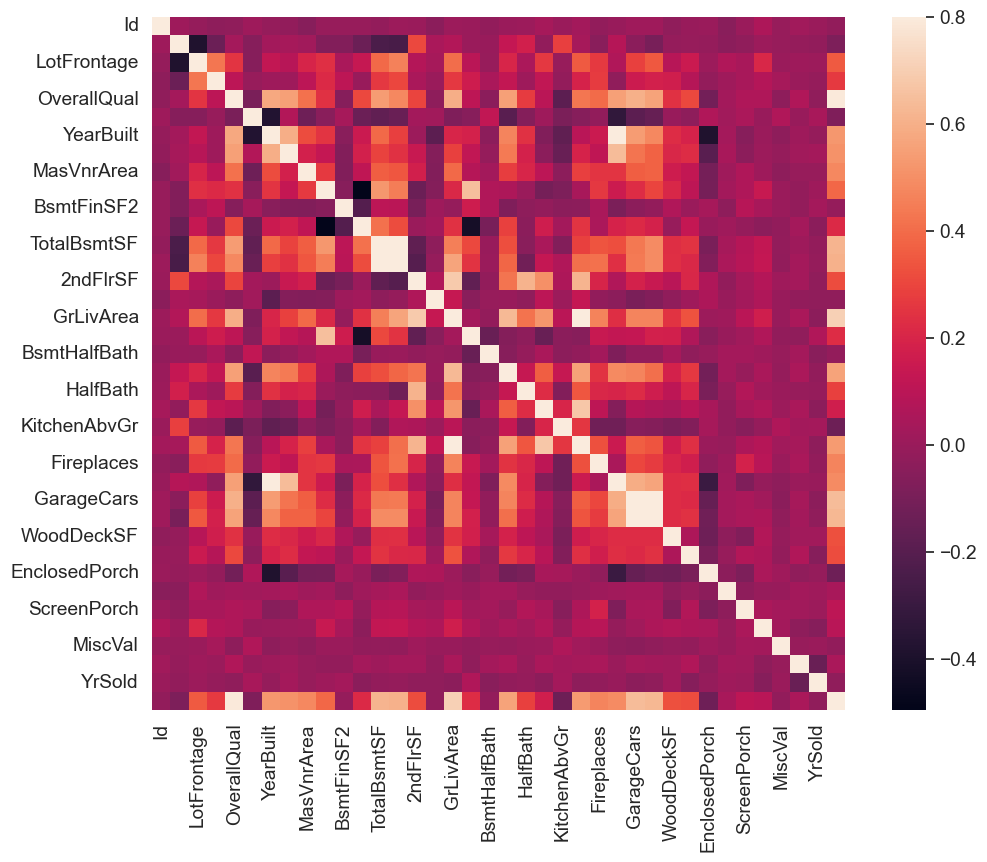

In [199]:
#correlation matrix
corrmat = train[numerical_features].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Check the top 10 features correlated with SalePrice

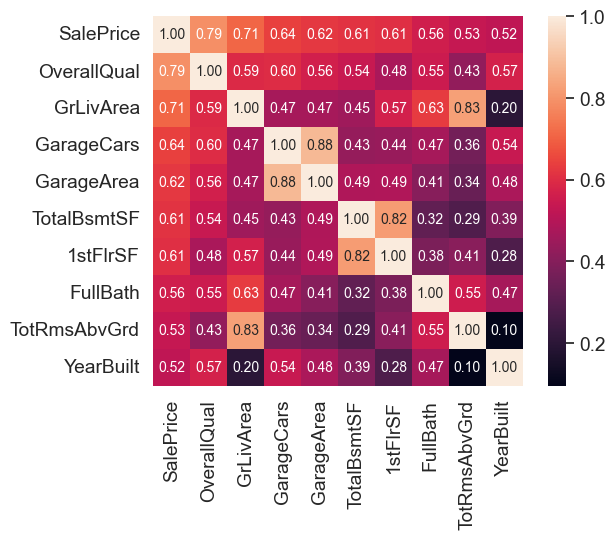

In [200]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd and YearBuilt are positivelycorrelated with more than 0.5

Check the 10 features with smaller correlation to SalePrice

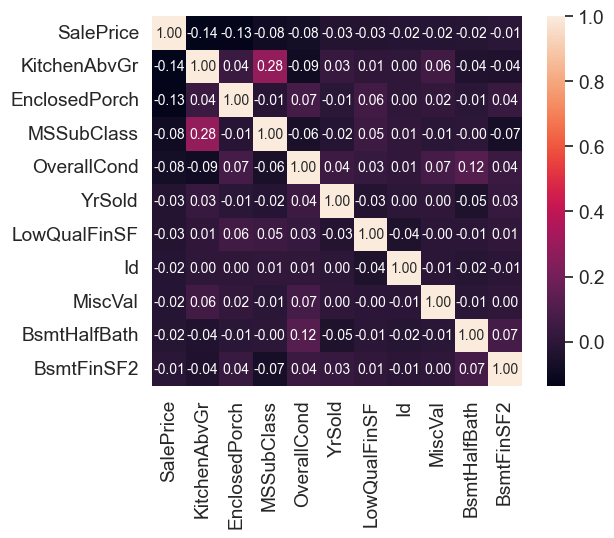

In [201]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nsmallest(10, 'SalePrice')['SalePrice'].index
cols = cols.insert(0,'SalePrice')
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

There are no highly negatively correlated features with SalePrice

# Box-Whisker plot

A box-whisker plot, also known as a box plot, is a type of statistical graph that displays the distribution of a dataset. The plot shows the median (or middle) value, the first quartile (25th percentile), the third quartile (75th percentile), and the range of the data. The range is usually defined by the minimum and maximum values or by some measure of spread like the interquartile range (IQR).

A box-whisker plot is created by drawing a box between the first and third quartiles with a vertical line inside it to represent the median. The whiskers extend from the box to the minimum and maximum values, or to a distance of 1.5 times the IQR from the box, whichever is shorter. Any data points outside this range are shown as individual points or asterisks.

The box-whisker plot is useful for detecting outliers, skewness, and the overall spread of the data. It can also be used to compare the distributions of multiple datasets side by side. By comparing the median and spread of different datasets, we can get a sense of the differences between them.

Box-whisker plots can be created manually using a spreadsheet or statistical software, or they can be automatically generated by many data analysis packages. They are commonly used in fields like statistics, finance, and data analysis to display the distribution of a dataset and to make comparisons between different groups or datasets.

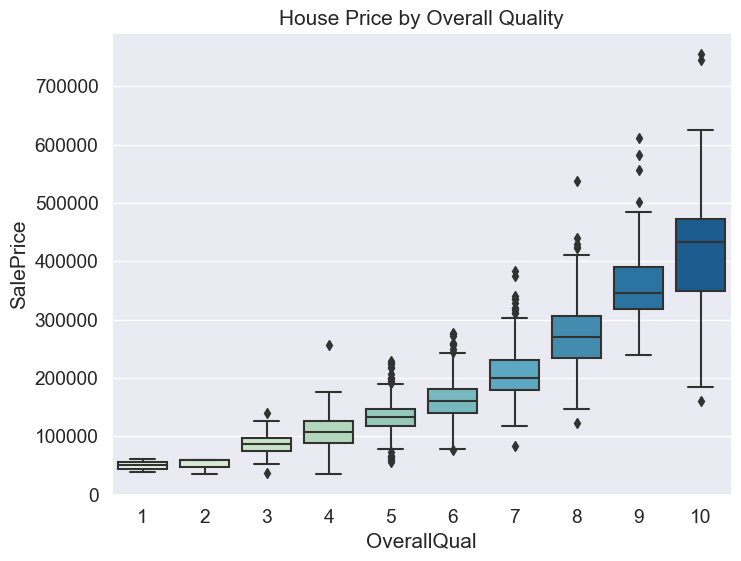

In [202]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train, palette='GnBu')
title = plt.title('House Price by Overall Quality')

# ANOVA

ANOVA helps to find out if the difference in the mean values is statistically significant. ANOVA also indirectly reveals if an independent variable is influencing the dependent variable.

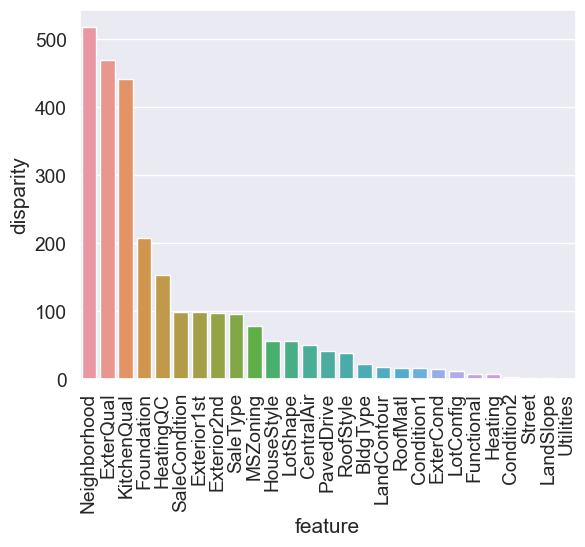

In [203]:
import scipy.stats as stats

def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_features
    pvals = []
    for c in categorical_features:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

anv = anova(train)
anv['disparity'] = np.log(1./anv['pval'].values)
sns.barplot(data=anv[anv.disparity>=0.5], x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [204]:
anv[anv.pval<=0.05]

feature           pval   disparity
8    Neighborhood  1.558600e-225  517.637858
18      ExterQual  1.439551e-204  469.363028
30    KitchenQual  3.032213e-192  440.987045
20     Foundation   5.791895e-91  207.778784
27      HeatingQC   2.667062e-67  153.292224
42  SaleCondition   7.988268e-44   99.235770
15    Exterior1st   2.586089e-43   98.061012
16    Exterior2nd   4.842186e-43   97.433793
41       SaleType   5.039767e-42   95.091214
0        MSZoning   8.817634e-35   78.413725
12     HouseStyle   3.376777e-25   56.347706
3        LotShape   6.447524e-25   55.700931
28     CentralAir   1.809506e-22   50.063818
37     PavedDrive   1.803569e-18   40.856764
13      RoofStyle   3.653523e-17   37.848255
11       BldgType   2.056736e-10   22.304730
4     LandContour   2.742217e-08   17.411914
14       RoofMatl   7.231445e-08   16.442242
9      Condition1   8.904549e-08   16.234118
19      ExterCond   5.106681e-07   14.487546
6       LotConfig   3.163167e-06   12.663937
31     Functional   4.841697e-04    7.633075
26        Heating   7.534721e-04    7.190819
10     Condition2   4.342566e-02    3.136705

In [205]:
print(categorical_features)
print(numerical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Ga

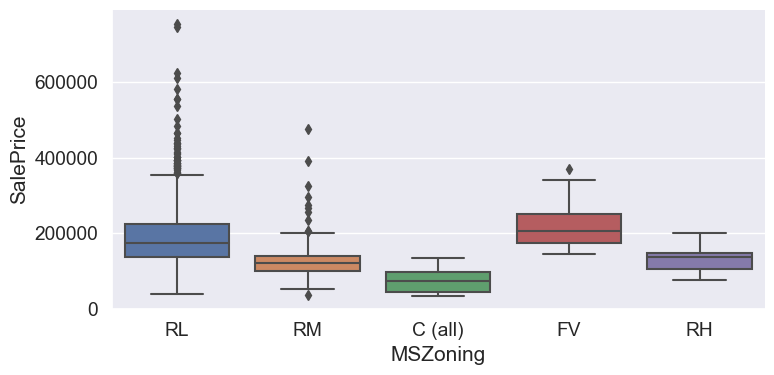

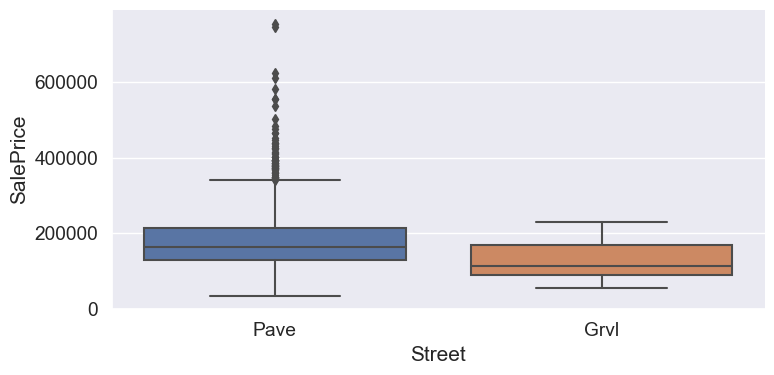

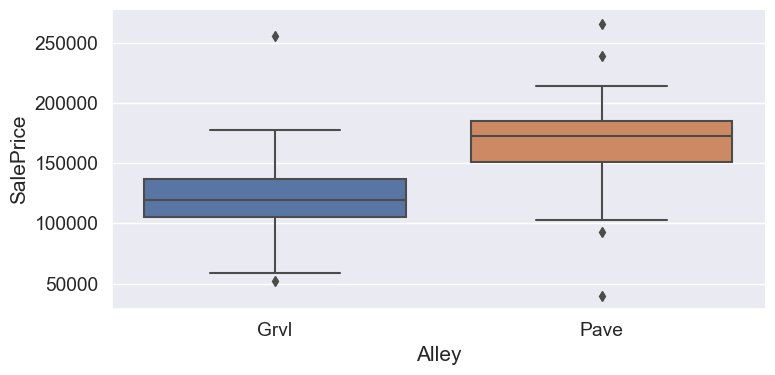

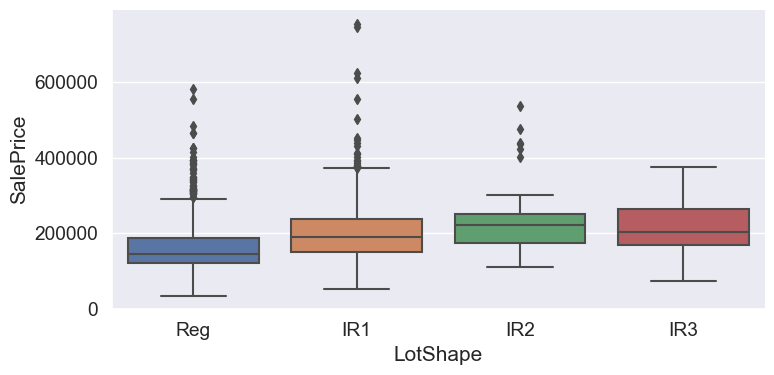

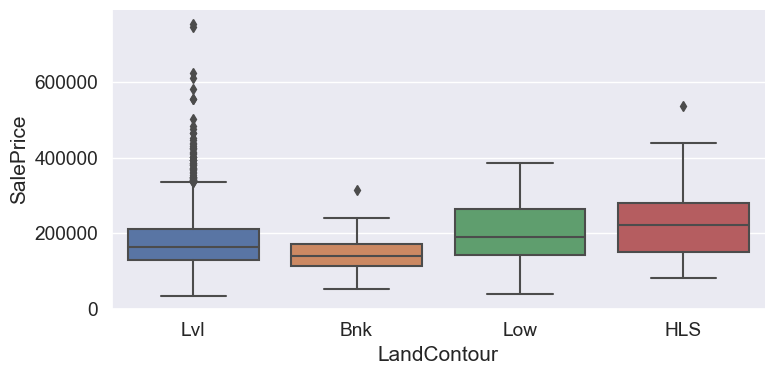

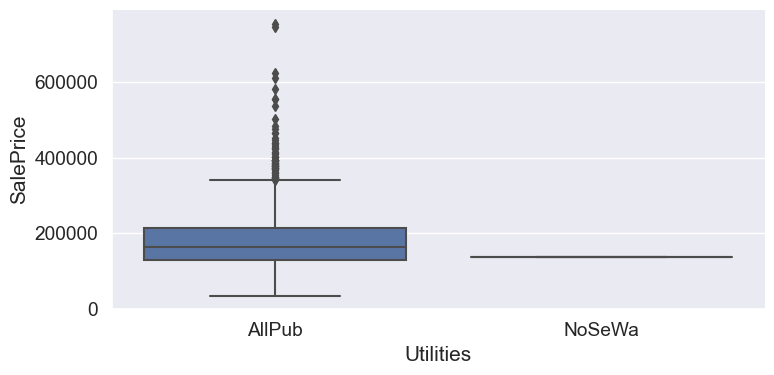

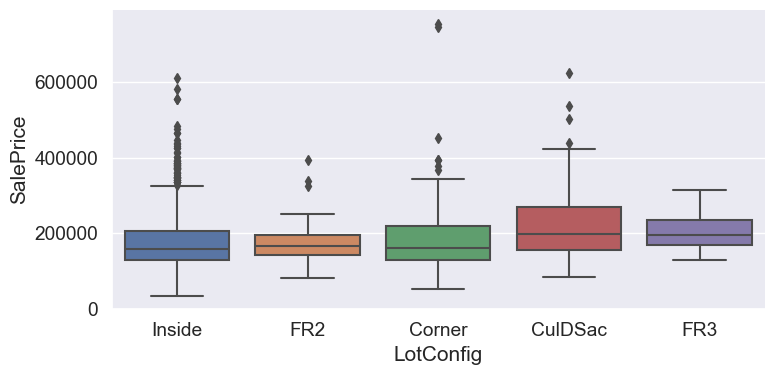

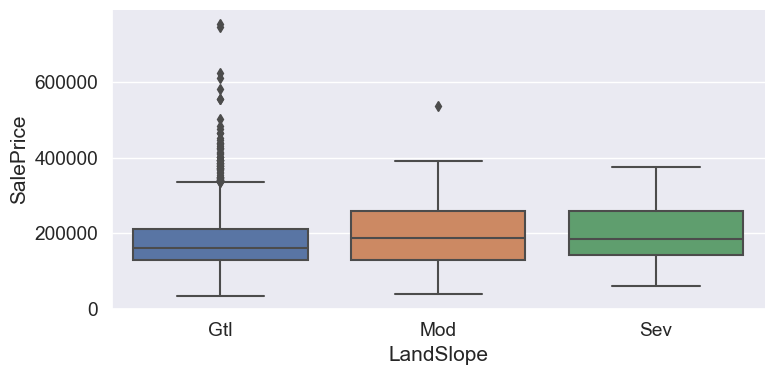

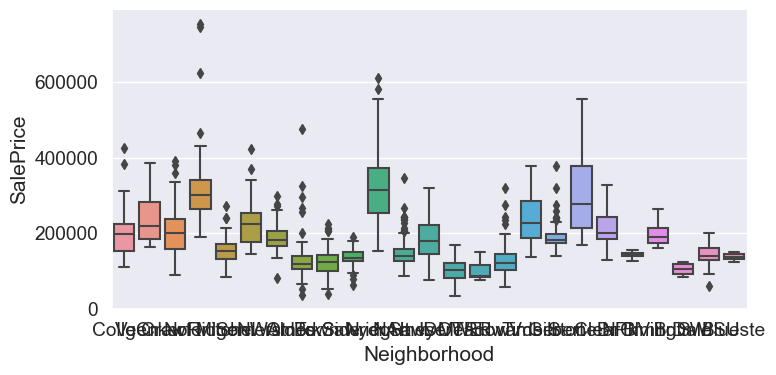

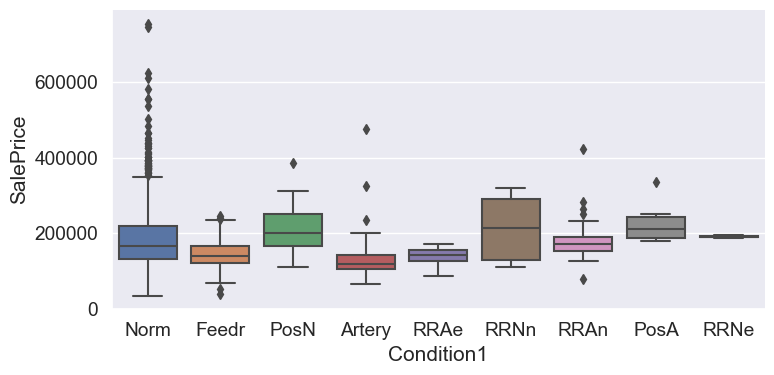

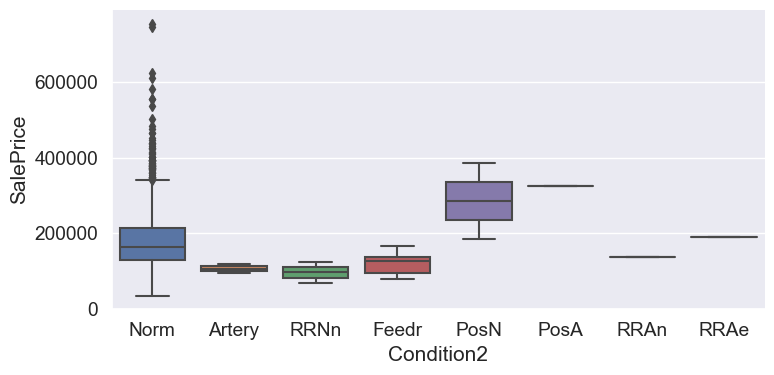

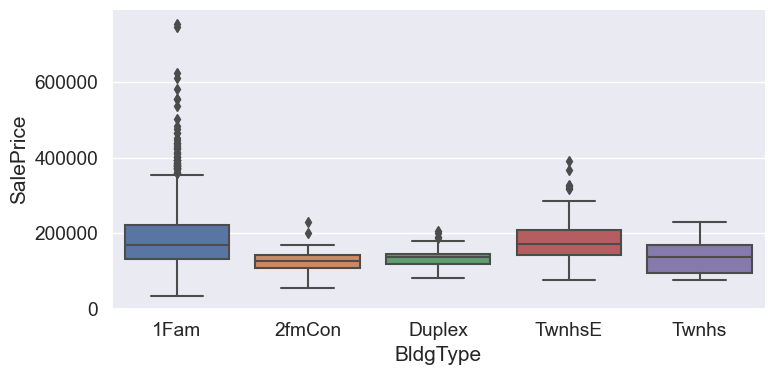

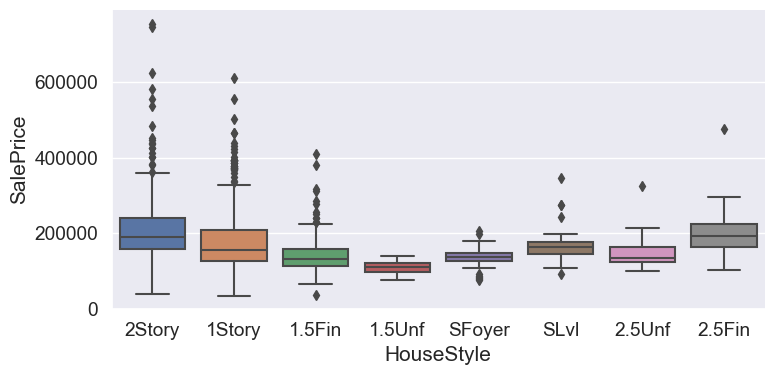

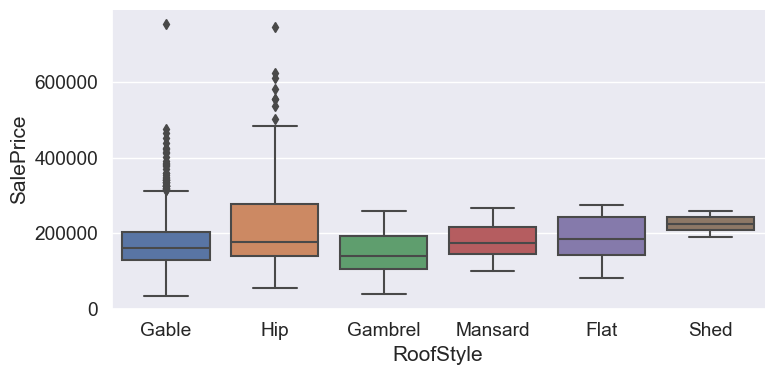

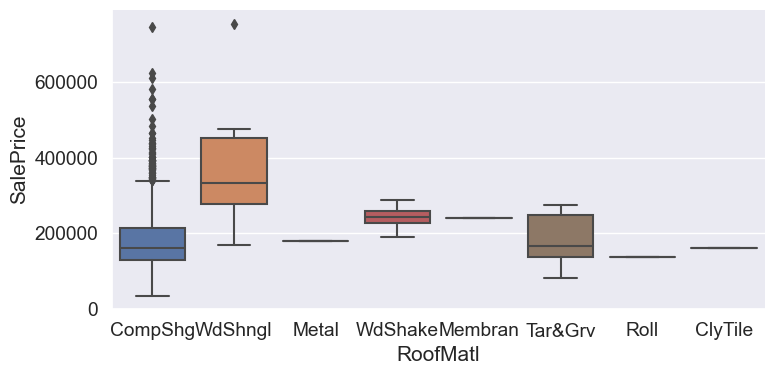

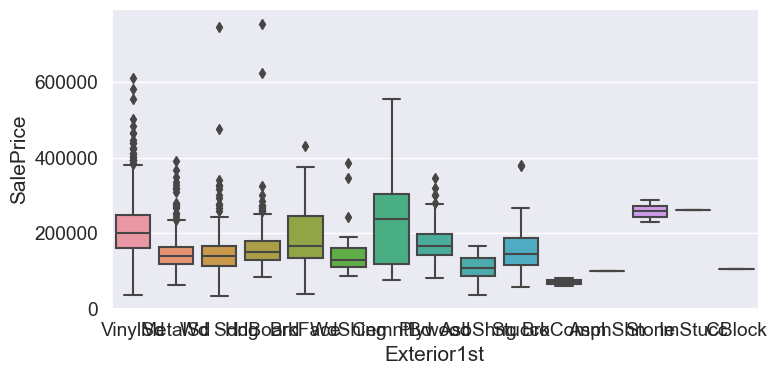

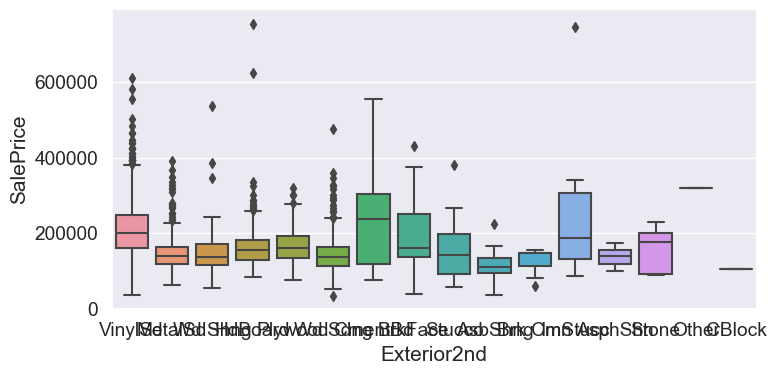

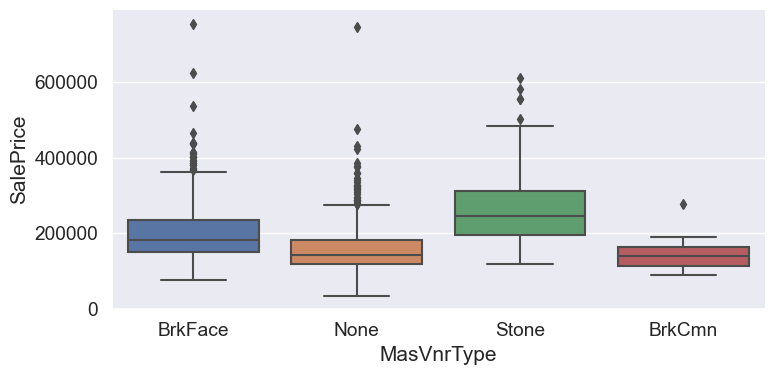

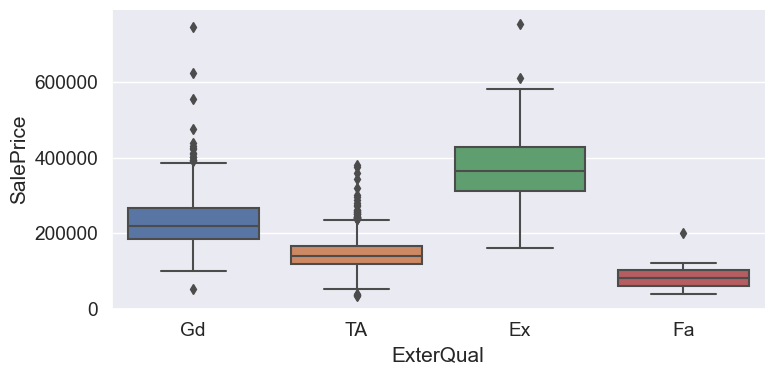

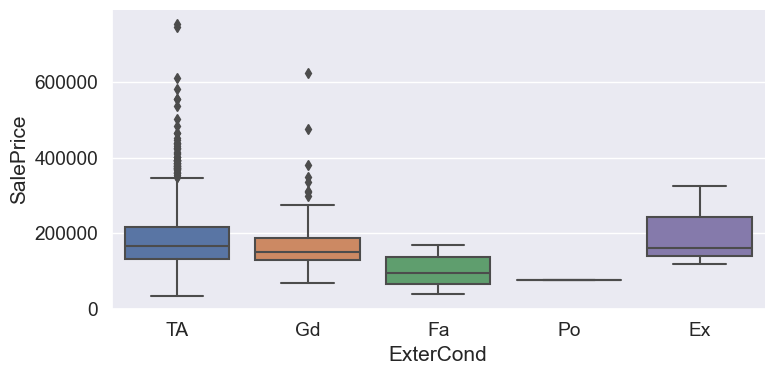

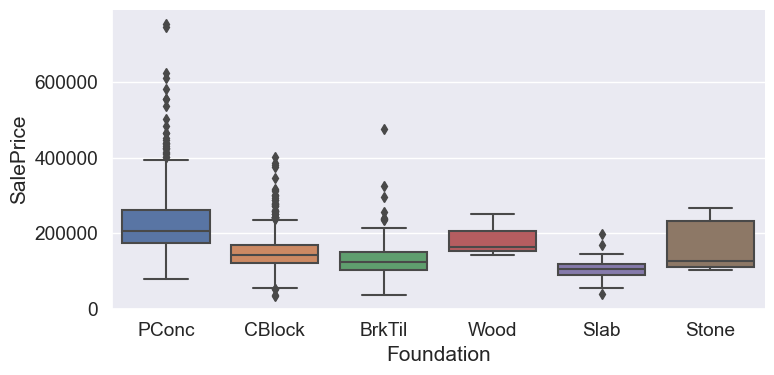

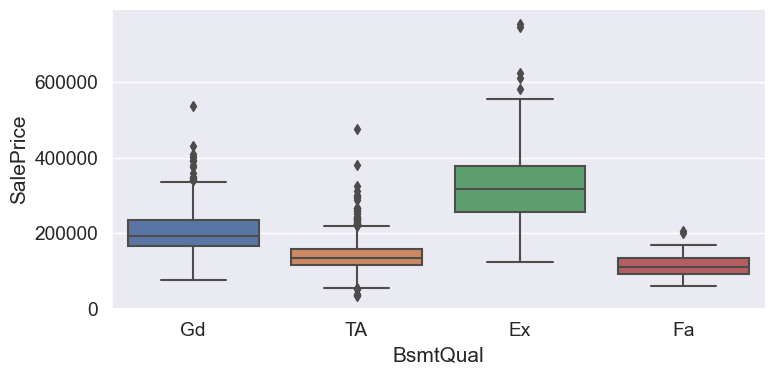

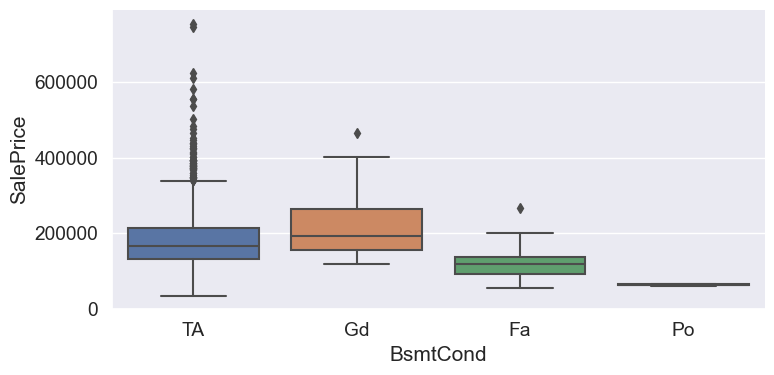

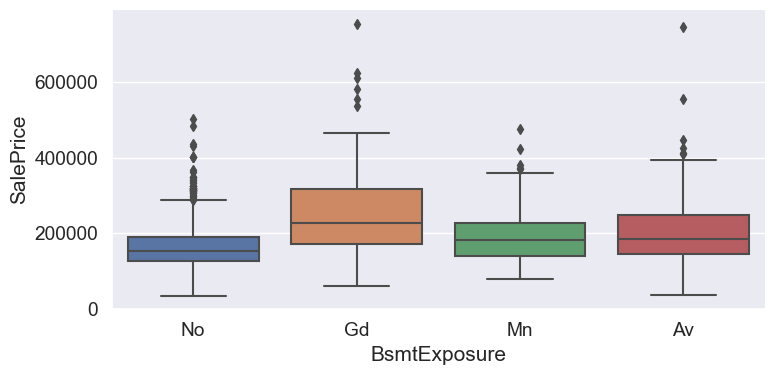

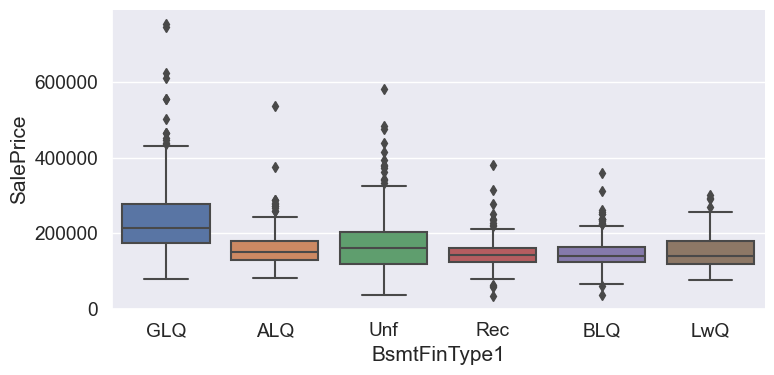

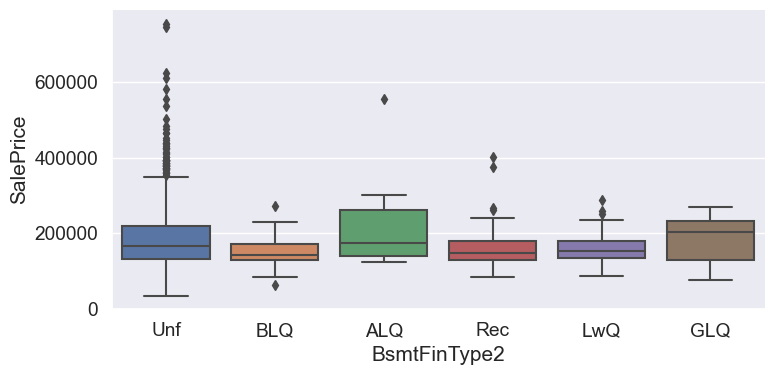

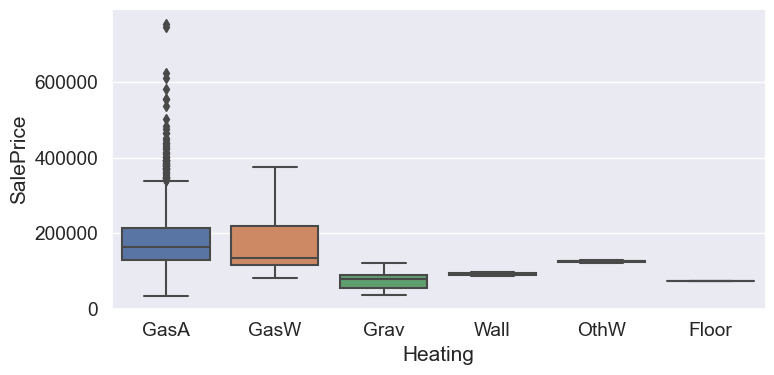

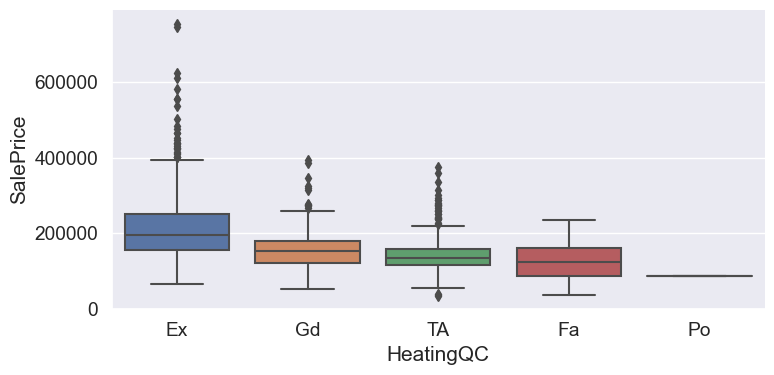

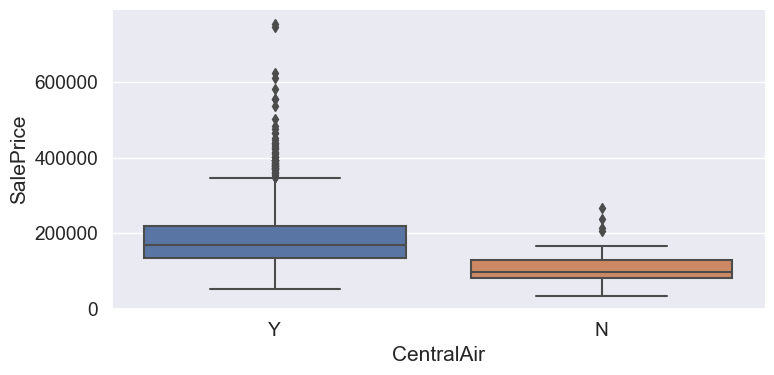

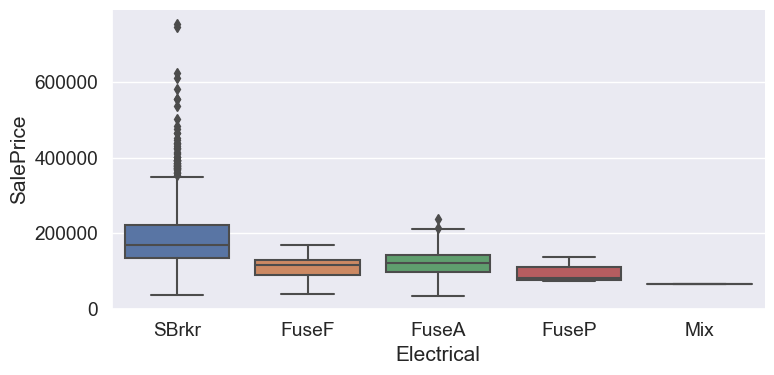

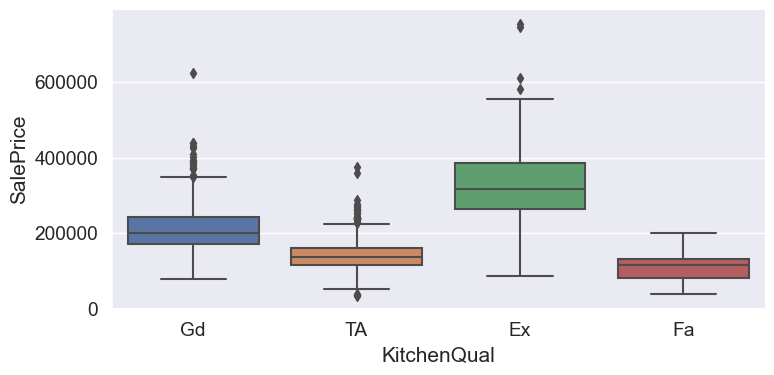

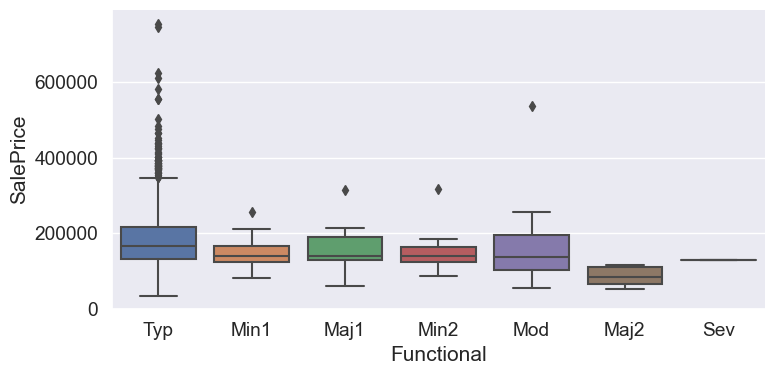

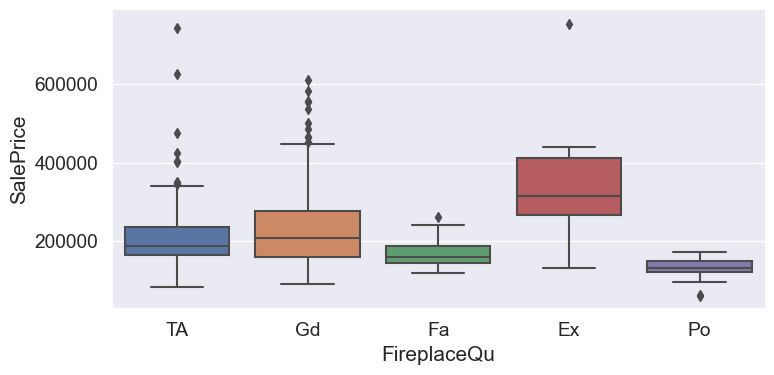

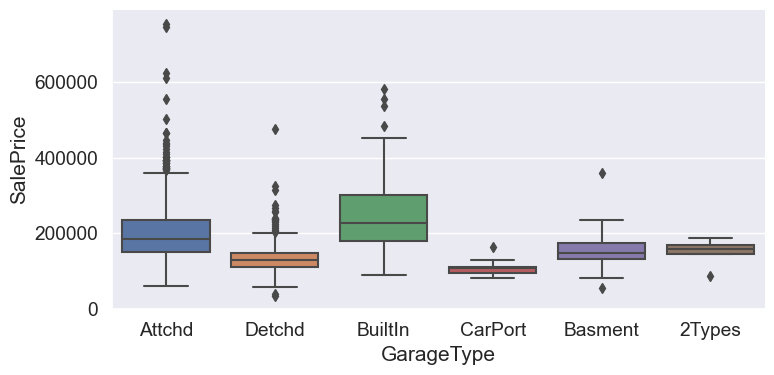

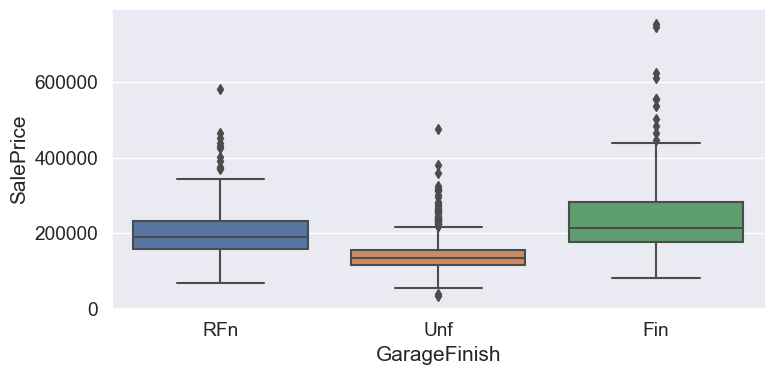

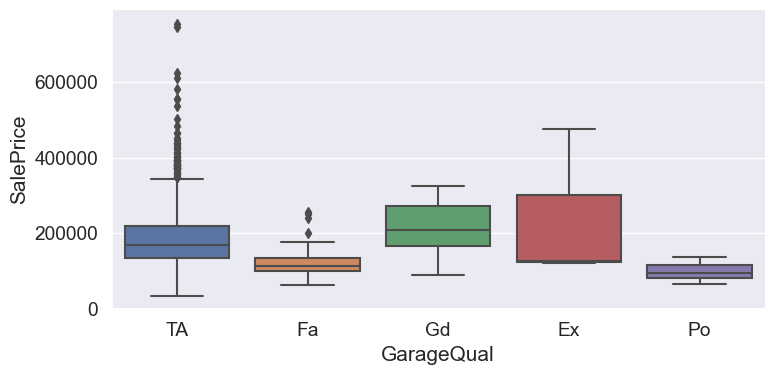

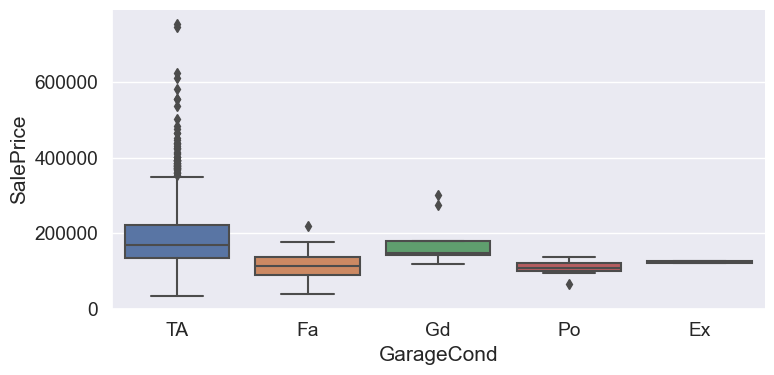

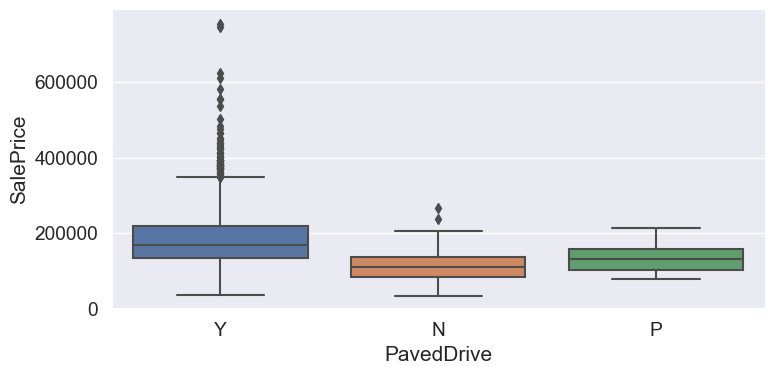

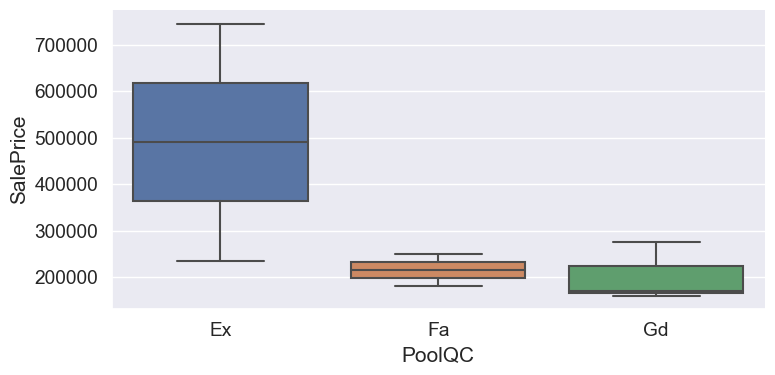

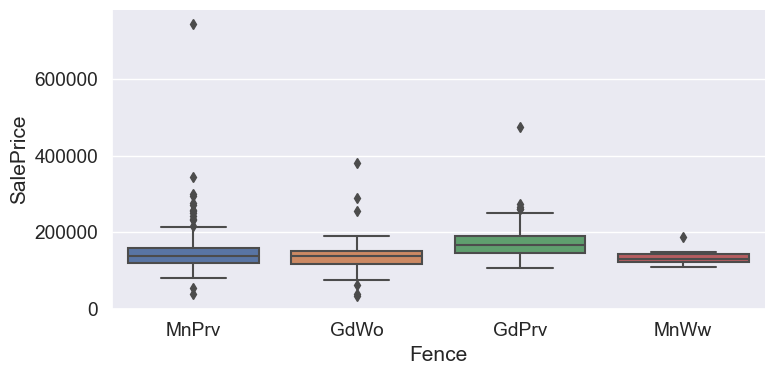

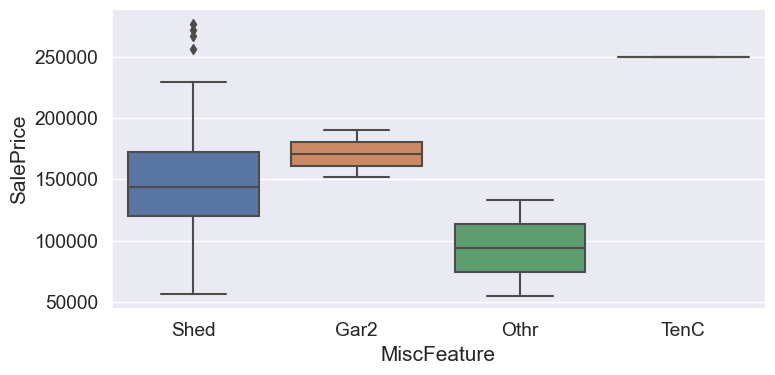

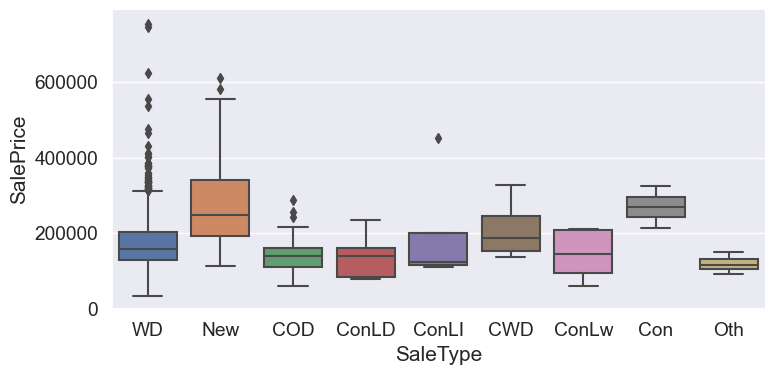

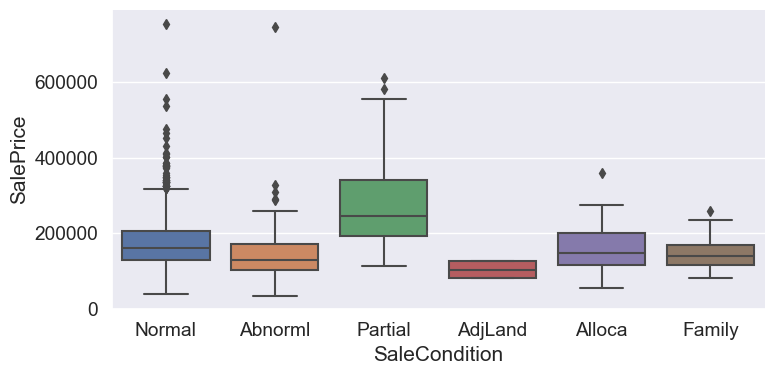

In [206]:
# Box Plot
for icol in categorical_features:
    sns.catplot(x=icol, y="SalePrice", data=train,kind = 'box',height = 4,aspect=2.0)